<a href="https://colab.research.google.com/github/aimanmalik98/Predicting_House_Price/blob/main/Predicting_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: Predicting the Housing Price

**Explanation of the Dataset:**

The dataset that have been chosen for the project is from kaggle ( link: House Prices - Advanced Regression Techniques | Kaggle) which is an ongoing competition. It comprises of 79 variables each of which explains different attributes of the housing price. The supervised variable (Y) is going to be the housing price, which is continuous in nature.
The total number of observations in the data are roughly 2920. Whereas the data has already been divided into 50:50 ratio of train and test.



**Choosing predictor strategy/ Exploratory Data Analysis**

LEAP package is applied to select a group of predicotrs that most significantly predicts the housing prices. We will be dropping the variables which have missing values in prices (as the prices is the dependent variables). We will build a correlation matrix and use this matrix to see which variables are correlated with each other in order to derive an interaction variable and capture its effect on the housing price. We will also use scatter plots to explain the relation of the housing price. We will also corroborate this by using Principal Component Analysis (PCA).

**Proposed Models**

The models that we have decided to choose are Multiple linear regression, in which we will also be using the interaction variables and make different models and compare their Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE). To see which model performed the best.

We will also be using Machine Learning Models such as Random Forest, Lasso, Ridge, and Decision Tree. While using a Decision tree we would be careful about not overfitting our data. We will train our model and then see the hyper tuned parameters for each of the models and compare them in a graphical representation to see which model is the best in predicting the housing price. We will also use a confusion matrix to see the performance of the models by analyzing its precision, recall and sensitivity along with using the ROC and AUC curve.


# Step 1: Loading and observing the data

**1.1 Data Loading**

Load the data from Github

In [201]:
# @title
! git clone https://github.com/sunquan2/STAT654.git
! ls

fatal: destination path 'STAT654' already exists and is not an empty directory.
best_model.h5  sample_data  STAT654


In [156]:
import pandas as pd
import numpy as np
import sklearn as sk
import mlxtend
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import HuberRegressor
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import export_graphviz
# Splitting data into training/testing
from sklearn.model_selection import train_test_split
# Metrics
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, median_absolute_error, r2_score
# Distributions
import scipy
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

In [3]:
# The following codes set the maximum columns to be displayed in the output table.
# During the process of data analysis, the numbers were set to none to display the whole data table.
pd.set_option('display.max_columns', None)

In [4]:
# the data consists of two csv files, a train file and a test file
# the train file contains the housing prices and a list of predictor variables.
# the test file contains the the same list of predictor variables, but the price variables are dropped
# our final mission is to use the predictors in the test dataset to predict the housing prices
test_raw = pd.read_csv('/content/STAT654/test.csv')
df = pd.read_csv('/content/STAT654/train.csv')

**1.2 Data Observation**

In [5]:
# looking at the dimensionalities of the dataset
print(" data dimension: ", df.shape)

 data dimension:  (1460, 81)


In [6]:
# the code below displays the data name, non-null count, and data type.
# for more informaiton regarding the data information, we could look at the data_description.txt file
# the data_description.txt file is saved in the same folder that was copied from GitHub
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

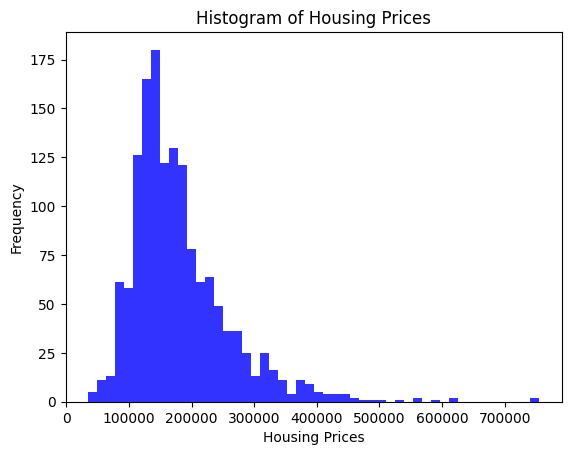

In [8]:
# Plot the dependent variable - the housing prices
plt.hist(df['SalePrice'], bins=50, color='blue', alpha=0.8)
plt.xlabel('Housing Prices')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.title('Histogram of Housing Prices')  # Title of the plot
plt.show()

In [9]:
# Create a Q-Q plot of housing prices
sm.qqplot(df['SalePrice'], line='45', fit=True)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Data')
plt.show()

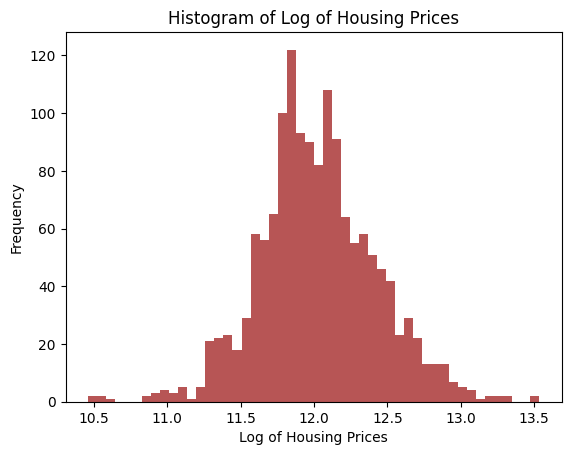

In [10]:
# The housing prices don't seem to follow a normal distribution, take the log of housing prices instead
plt.hist(np.log(df['SalePrice']), bins=50, color='Brown', alpha=0.8)
plt.xlabel('Log of Housing Prices')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.title('Histogram of Log of Housing Prices')  # Title of the plot
plt.show()

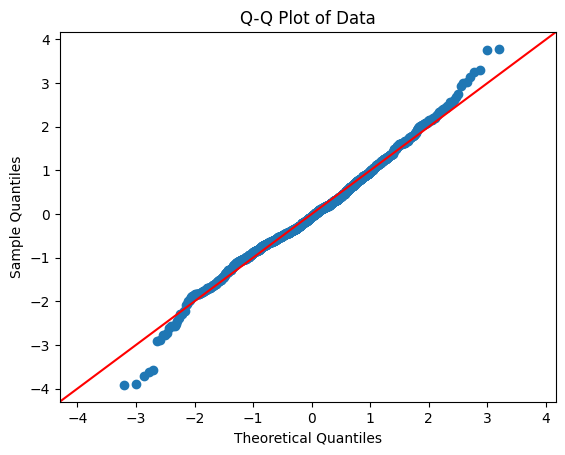

In [11]:
# Creating the Q-Q plot of the log of housing prices
# Create a Q-Q plot of housing prices
sm.qqplot(np.log(df['SalePrice']), line='45', fit=True)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Data')
plt.show()

**Preliminary conclusions**

1. From the observation of attributes that have missing values.

As the above info summary suggests, the following attributes has some missing values, which are: LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature. All other attributes don't have any missing values.

Referring to the *data_description.txt*, following explanation to identified attributes was found.

LotFrontage: Linear feet of street connected to property

Alley: Type of alley access to property

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

BsmtQual: Evaluates the height of the basement

BsmtExposure: Refers to walkout or garden level walls

BsmtFinType1: Rating of basement finished area

BsmtFinType2: Rating of basement finished area (if multiple types)

Electrical: Electrical system

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageQual: Garage quality

GarageCond: Garage condition

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

These explanations suggest that the missing value may not be any data entering or collection error. Instead, the value might be missing due to the nature of the data. In other words, the missing values most likely indicate that the attribute doesn't apply to the corresponding house. Therefore, no observations should be dropped from the analysis simply because it has some missing values.

Our observation of the data shows that there are no observations which have a null value for the dependent variables - price.

Therefore, all data in the training data will be kept in use

2. From observing the normality test of the dependent variable, we noticed the housing prices are not normally distributed. The normality requirement for linear model applies for residual, not for y. But we should keep in mind that as Y is not normally distributed, the model could be skewed towards cheaper houses.

The log of housing prices are close to normal distribution, therefore, we might consider to create a model to predict the log of housing prices.

# Step 2: Linear Model Variable Selection

**2.1 Create the log of SalePrice as a candidate for dependent variable**

As discussed above, we create a log of saleprice as a candidate for alternative model that uses the log of housing price as the dependent variable.

In [12]:
df['Log_SalePrice'] = np.log(df['SalePrice'])

In [13]:
df['Log_SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: Log_SalePrice, Length: 1460, dtype: float64

**2.2 Data Normalization**

We consider to include all observations in the training dataset, as none of the observations have missing values for dependent variable "prices". However, before generating a correlation matrix, we would first normalize the data so that the unit for each variables are equalized.

We will create a seperate dataframe to store the normalized data attributes

In [14]:
# calculate the mean and variable for each data columns whose data type is int
int_cols = df.select_dtypes(include=['float', 'int'])
int_cols

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0          2003          2003       196.0         706           0        150   
1          1976          1976         0.0         978           0        284   
2          2001          2002       162.0         486           0        434   
3          1915          1970         0.0         216           0        540   
4          2000          2000       350.0         655           0        490   
...         ...           ...         ...         ...         ...        ...   
1455       1999          2000         0.0           0           0        953   
1456       1978          1988       119.0         790         163        589   
1457       1941          2006         0.0         275           0        877   
1458       1950          1996         0.0          49        1029          0   
1459       1965          1965         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4

By looking at the data discription table, we found two integer variables are infact categorical. These two integer virables are:

**Id**: the index of the observations.

**MSSubClass**: Identifies the type of dwelling involved in the sale.

We convert the ID and MSSubClass to type String before apply the data normalization.


In [15]:
# convert the ID and MSSubClass into str
df['Id'] = df['Id'].astype(str)
df['MSSubClass'] = df['MSSubClass'].astype(str)

# create a copy of dataframe to perform the normalization
df_copy = df.copy()

In [16]:
# Normalize the data using z-socre
# Select only numeric columns (float and integer columns)
num_cols = df_copy.select_dtypes(include=['float', 'int'])

# Perform Z-score normalization on numeric columns
num_cols_normalized = (num_cols - num_cols.mean()) / num_cols.std()

# Replace the original numeric columns with normalized values
df_copy[num_cols_normalized.columns] = num_cols_normalized

# print the normalized dataframe
print(df_copy)

        Id MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0        1         60       RL    -0.207948 -0.207071   Pave   NaN      Reg   
1        2         20       RL     0.409724 -0.091855   Pave   NaN      Reg   
2        3         60       RL    -0.084413  0.073455   Pave   NaN      IR1   
3        4         70       RL    -0.413838 -0.096864   Pave   NaN      IR1   
4        5         60       RL     0.574436  0.375020   Pave   NaN      IR1   
...    ...        ...      ...          ...       ...    ...   ...      ...   
1455  1456         60       RL    -0.331482 -0.260471   Pave   NaN      Reg   
1456  1457         20       RL     0.615614  0.266316   Pave   NaN      Reg   
1457  1458         70       RL    -0.166770 -0.147760   Pave   NaN      Reg   
1458  1459         20       RL    -0.084413 -0.080133   Pave   NaN      Reg   
1459  1460         20       RL     0.203833 -0.058092   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neig

**2.3 Dealing with Categorical Data**

For ordinary data and intergers, we leave them as they are. However, categorical variables cannot be used in regression analysis directly. To run regression on categorical variables, we should recode the corresponding categorical variables to boolean variables.

In [17]:
# print the list of columns that are string or object data types
int_cat = df.select_dtypes(include=['object'])
# this is a list of columns that are categorical variables, we will use this list to convert them to boolean variables
list_obj = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2',
            'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
            'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
            'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

In [18]:
# Display the original DataFrame
print("Original DataFrame:")
print(df_copy)

# Convert string column to dummy variables
df_dummy = pd.get_dummies(df_copy, columns=list_obj)

Original DataFrame:
        Id MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0        1         60       RL    -0.207948 -0.207071   Pave   NaN      Reg   
1        2         20       RL     0.409724 -0.091855   Pave   NaN      Reg   
2        3         60       RL    -0.084413  0.073455   Pave   NaN      IR1   
3        4         70       RL    -0.413838 -0.096864   Pave   NaN      IR1   
4        5         60       RL     0.574436  0.375020   Pave   NaN      IR1   
...    ...        ...      ...          ...       ...    ...   ...      ...   
1455  1456         60       RL    -0.331482 -0.260471   Pave   NaN      Reg   
1456  1457         20       RL     0.615614  0.266316   Pave   NaN      Reg   
1457  1458         70       RL    -0.166770 -0.147760   Pave   NaN      Reg   
1458  1459         20       RL    -0.084413 -0.080133   Pave   NaN      Reg   
1459  1460         20       RL     0.203833 -0.058092   Pave   NaN      Reg   

     LandContour Utilities LotC

In [19]:
# the df_dummy is the data frame that is ready for regression analysis.
df_dummy

Id  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0        1    -0.207948 -0.207071     0.651256    -0.517023   1.050634   
1        2     0.409724 -0.091855    -0.071812     2.178881   0.156680   
2        3    -0.084413  0.073455     0.651256    -0.517023   0.984415   
3        4    -0.413838 -0.096864     0.651256    -0.517023  -1.862993   
4        5     0.574436  0.375020     1.374324    -0.517023   0.951306   
...    ...          ...       ...          ...          ...        ...   
1455  1456    -0.331482 -0.260471    -0.071812    -0.517023   0.918196   
1456  1457     0.615614  0.266316    -0.071812     0.381612   0.222899   
1457  1458    -0.166770 -0.147760     0.651256     3.077516  -1.002149   
1458  1459    -0.084413 -0.080133    -0.794879     0.381612  -0.704164   
1459  1460     0.203833 -0.058092    -0.794879     0.381612  -0.207523   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         0.878367    0.509840    0.575228   -0.288554  -0.944267   
1        -0.429430   -0.572637    1.171591   -0.288554  -0.641008   
2         0.829930    0.322063    0.092875   -0.288554  -0.301540   
3        -0.720051   -0.572637   -0.499103   -0.288554  -0.061648   
4         0.733056    1.360357    0.463410   -0.288554  -0.174805   
...            ...         ...         ...         ...        ...   
1455      0.733056   -0.572637   -0.972685   -0.288554   0.873022   
1456      0.151813    0.084581    0.759399    0.721865   0.049245   
1457      1.023678   -0.572637   -0.369744   -0.288554   0.701025   
1458      0.539309   -0.572637   -0.865252    6.090101  -1.283736   
1459     -0.962236   -0.572637    0.847099    1.509123  -0.975951   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0       -0.459145 -0.793162  1.161454     -0.120201   0.370207      1.107431   
1        0.466305  0.257052 -0.794891     -0.120201  -0.482347     -0.819684   
2       -0.313261 -0.627611  1.188943     -0.120201   0.514836      1.107431   
3       -0.687089 -0.521555  0.936955     -0.120201   0.383528      1.107431   
4        0.199611 -0.045596  1.617323     -0.120201   1.298881      1.107431   
...           ...       ...       ...           ...        ...           ...   
1455    -0.238040 -0.542249  0.794925     -0.120201   0.250316     -0.819684   
1456     1.104547  2.354894 -0.794891     -0.120201   1.061003      1.107431   
1457     0.215567  0.065634  1.844112     -0.120201   1.569110     -0.819684   
1458     0.046889 -0.218907 -0.794891     -0.120201  -0.832502      1.107431   
1459     0.452629  0.241532 -0.794891     -0.120201  -0.493765      1.107431   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0        -0.240978  0.789470  1.227165      0.163723     -0.211381   
1         3.947457  0.789470 -0.761360      0.163723     -0.211381   
2        -0.240978  0.789470  1.227165      0.163723     -0.211381   
3        -0.240978 -1.025689 -0.761360      0.163723     -0.211381   
4        -0.240978  0.789470  1.227165      1.389547     -0.211381   
...            ...       ...       ...           ...           ...   
1455     -0.240978  0.789470  1.227165      0.163723     -0.211381   
1456     -0.240978  0.789470 -0.761360      0.163723     -0.211381   
1457     -0.240978  0.789470 -0.761360      1.389547     -0.211381   
1458     -0.240978 -1.025689 -0.761360     -1.062101     -0.211381   
1459     -0.240978 -1.025689  1.227165      0.163723     -0.211381   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0         0.911897   -0.950901     0.992066    0.311618    0.350880   
1        -0.318574    0.600289    -0.101506    0.311618   -0.060710   
2        -0.318574    0.600289     0.911061    0.311618    0.631510   
3         0.296662    0.600289     0.789553    1.649742    0.790533   
4         1.527133    0.600289     0.870558    1.649742    1.697903   
...            ...         ...          ...         ...       

**2.3 Select 25 most significant factors**

The data set has1460 rows and 305 columns, which is too large to manage.

To narrow down the number of preictors, we will perform a multivariate linear model to choose 25 variables that have the lowest p values.

Among the 305 variables, we observed that id is not necessary, therefore we first we will drop it. Then, we will use SalesPrice as dependent variables, and the remaining 302 vairables excluding Log_SalesPrice as the independent variables.

In [20]:
# drop the id
df_dummy = df_dummy.drop('Id', axis=1)
df_dummy

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       -0.207948 -0.207071     0.651256    -0.517023   1.050634   
1        0.409724 -0.091855    -0.071812     2.178881   0.156680   
2       -0.084413  0.073455     0.651256    -0.517023   0.984415   
3       -0.413838 -0.096864     0.651256    -0.517023  -1.862993   
4        0.574436  0.375020     1.374324    -0.517023   0.951306   
...           ...       ...          ...          ...        ...   
1455    -0.331482 -0.260471    -0.071812    -0.517023   0.918196   
1456     0.615614  0.266316    -0.071812     0.381612   0.222899   
1457    -0.166770 -0.147760     0.651256     3.077516  -1.002149   
1458    -0.084413 -0.080133    -0.794879     0.381612  -0.704164   
1459     0.203833 -0.058092    -0.794879     0.381612  -0.207523   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         0.878367    0.509840    0.575228   -0.288554  -0.944267   
1        -0.429430   -0.572637    1.171591   -0.288554  -0.641008   
2         0.829930    0.322063    0.092875   -0.288554  -0.301540   
3        -0.720051   -0.572637   -0.499103   -0.288554  -0.061648   
4         0.733056    1.360357    0.463410   -0.288554  -0.174805   
...            ...         ...         ...         ...        ...   
1455      0.733056   -0.572637   -0.972685   -0.288554   0.873022   
1456      0.151813    0.084581    0.759399    0.721865   0.049245   
1457      1.023678   -0.572637   -0.369744   -0.288554   0.701025   
1458      0.539309   -0.572637   -0.865252    6.090101  -1.283736   
1459     -0.962236   -0.572637    0.847099    1.509123  -0.975951   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0       -0.459145 -0.793162  1.161454     -0.120201   0.370207      1.107431   
1        0.466305  0.257052 -0.794891     -0.120201  -0.482347     -0.819684   
2       -0.313261 -0.627611  1.188943     -0.120201   0.514836      1.107431   
3       -0.687089 -0.521555  0.936955     -0.120201   0.383528      1.107431   
4        0.199611 -0.045596  1.617323     -0.120201   1.298881      1.107431   
...           ...       ...       ...           ...        ...           ...   
1455    -0.238040 -0.542249  0.794925     -0.120201   0.250316     -0.819684   
1456     1.104547  2.354894 -0.794891     -0.120201   1.061003      1.107431   
1457     0.215567  0.065634  1.844112     -0.120201   1.569110     -0.819684   
1458     0.046889 -0.218907 -0.794891     -0.120201  -0.832502      1.107431   
1459     0.452629  0.241532 -0.794891     -0.120201  -0.493765      1.107431   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0        -0.240978  0.789470  1.227165      0.163723     -0.211381   
1         3.947457  0.789470 -0.761360      0.163723     -0.211381   
2        -0.240978  0.789470  1.227165      0.163723     -0.211381   
3        -0.240978 -1.025689 -0.761360      0.163723     -0.211381   
4        -0.240978  0.789470  1.227165      1.389547     -0.211381   
...            ...       ...       ...           ...           ...   
1455     -0.240978  0.789470  1.227165      0.163723     -0.211381   
1456     -0.240978  0.789470 -0.761360      0.163723     -0.211381   
1457     -0.240978  0.789470 -0.761360      1.389547     -0.211381   
1458     -0.240978 -1.025689 -0.761360     -1.062101     -0.211381   
1459     -0.240978 -1.025689  1.227165      0.163723     -0.211381   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0         0.911897   -0.950901     0.992066    0.311618    0.350880   
1        -0.318574    0.600289    -0.101506    0.311618   -0.060710   
2        -0.318574    0.600289     0.911061    0.311618    0.631510   
3         0.296662    0.600289     0.789553    1.649742    0.790533   
4         1.527133    0.600289     0.870558    1.649742    1.697903   
...            ...         ...          ...         ...         ...   
1455      0.296662    0.600289     0.830055    0.311618   -0.

In [21]:
# Create X as independent variables. X include all variables except for sales price and log of sales prices
X = df_dummy.drop('SalePrice', axis=1)
X = X.drop('Log_SalePrice', axis=1)
X

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       -0.207948 -0.207071     0.651256    -0.517023   1.050634   
1        0.409724 -0.091855    -0.071812     2.178881   0.156680   
2       -0.084413  0.073455     0.651256    -0.517023   0.984415   
3       -0.413838 -0.096864     0.651256    -0.517023  -1.862993   
4        0.574436  0.375020     1.374324    -0.517023   0.951306   
...           ...       ...          ...          ...        ...   
1455    -0.331482 -0.260471    -0.071812    -0.517023   0.918196   
1456     0.615614  0.266316    -0.071812     0.381612   0.222899   
1457    -0.166770 -0.147760     0.651256     3.077516  -1.002149   
1458    -0.084413 -0.080133    -0.794879     0.381612  -0.704164   
1459     0.203833 -0.058092    -0.794879     0.381612  -0.207523   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         0.878367    0.509840    0.575228   -0.288554  -0.944267   
1        -0.429430   -0.572637    1.171591   -0.288554  -0.641008   
2         0.829930    0.322063    0.092875   -0.288554  -0.301540   
3        -0.720051   -0.572637   -0.499103   -0.288554  -0.061648   
4         0.733056    1.360357    0.463410   -0.288554  -0.174805   
...            ...         ...         ...         ...        ...   
1455      0.733056   -0.572637   -0.972685   -0.288554   0.873022   
1456      0.151813    0.084581    0.759399    0.721865   0.049245   
1457      1.023678   -0.572637   -0.369744   -0.288554   0.701025   
1458      0.539309   -0.572637   -0.865252    6.090101  -1.283736   
1459     -0.962236   -0.572637    0.847099    1.509123  -0.975951   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0       -0.459145 -0.793162  1.161454     -0.120201   0.370207      1.107431   
1        0.466305  0.257052 -0.794891     -0.120201  -0.482347     -0.819684   
2       -0.313261 -0.627611  1.188943     -0.120201   0.514836      1.107431   
3       -0.687089 -0.521555  0.936955     -0.120201   0.383528      1.107431   
4        0.199611 -0.045596  1.617323     -0.120201   1.298881      1.107431   
...           ...       ...       ...           ...        ...           ...   
1455    -0.238040 -0.542249  0.794925     -0.120201   0.250316     -0.819684   
1456     1.104547  2.354894 -0.794891     -0.120201   1.061003      1.107431   
1457     0.215567  0.065634  1.844112     -0.120201   1.569110     -0.819684   
1458     0.046889 -0.218907 -0.794891     -0.120201  -0.832502      1.107431   
1459     0.452629  0.241532 -0.794891     -0.120201  -0.493765      1.107431   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0        -0.240978  0.789470  1.227165      0.163723     -0.211381   
1         3.947457  0.789470 -0.761360      0.163723     -0.211381   
2        -0.240978  0.789470  1.227165      0.163723     -0.211381   
3        -0.240978 -1.025689 -0.761360      0.163723     -0.211381   
4        -0.240978  0.789470  1.227165      1.389547     -0.211381   
...            ...       ...       ...           ...           ...   
1455     -0.240978  0.789470  1.227165      0.163723     -0.211381   
1456     -0.240978  0.789470 -0.761360      0.163723     -0.211381   
1457     -0.240978  0.789470 -0.761360      1.389547     -0.211381   
1458     -0.240978 -1.025689 -0.761360     -1.062101     -0.211381   
1459     -0.240978 -1.025689  1.227165      0.163723     -0.211381   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0         0.911897   -0.950901     0.992066    0.311618    0.350880   
1        -0.318574    0.600289    -0.101506    0.311618   -0.060710   
2        -0.318574    0.600289     0.911061    0.311618    0.631510   
3         0.296662    0.600289     0.789553    1.649742    0.790533   
4         1.527133    0.600289     0.870558    1.649742    1.697903   
...            ...         ...          ...         ...         ...   
1455      0.296662    0.600289     0.830055    0.311618   -0.

In [22]:
# Before running the model, we need to check if any independent variables have missing values
pd.set_option('display.max_rows', None)
print(X.isna().any())
pd.set_option('display.max_rows', 10)

LotFrontage               True
LotArea                  False
OverallQual              False
OverallCond              False
YearBuilt                False
YearRemodAdd             False
MasVnrArea                True
BsmtFinSF1               False
BsmtFinSF2               False
BsmtUnfSF                False
TotalBsmtSF              False
1stFlrSF                 False
2ndFlrSF                 False
LowQualFinSF             False
GrLivArea                False
BsmtFullBath             False
BsmtHalfBath             False
FullBath                 False
HalfBath                 False
BedroomAbvGr             False
KitchenAbvGr             False
TotRmsAbvGrd             False
Fireplaces               False
GarageYrBlt               True
GarageCars               False
GarageArea               False
WoodDeckSF               False
OpenPorchSF              False
EnclosedPorch            False
3SsnPorch                False
ScreenPorch              False
PoolArea                 False
MiscVal 

In [24]:
# by observing the printed outcomes, we found three variables which have some missing values.
has_none = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
# among the three variables, we found that the reason for value missing is that they don't exist for some variables.
# we will just impute the missing value to be 0, which means the missing values are imputed to be the mean of each variable

# Assign all NaN values to 0
X.fillna(0, inplace=True)
X.isna().any().any()

False

In [25]:
# Create Y as dependent variable, with Y being the Sale Price
Y = df['SalePrice']

# Create Log_Y as dependent variable, with Log_Y being the Log of Sale Price
Log_Y = df['Log_SalePrice']

Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Run model based on X and Y

Reference: https://www.statology.org/sklearn-linear-regression-summary/

In [27]:


#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(Y, X).fit()

#view model summary
print(model.summary())
mse = model.mse_resid
print(mse)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     63.44
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:21:45   Log-Likelihood:                -16563.
No. Observations:                1460   AIC:                         3.366e+04
Df Residuals:                    1194   BIC:                         3.506e+04
Df Model:                         265                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.037e+

In [28]:
print(mse)

511420294.6656533


In [29]:
from sklearn import linear_model
import statsmodels.api as sm

#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(Log_Y, X).fit()

#view model summary
print(model.summary())
mse = model.mse_resid
print(mse)

                            OLS Regression Results                            
Dep. Variable:          Log_SalePrice   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     78.32
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:22:14   Log-Likelihood:                 1393.9
No. Observations:                1460   AIC:                            -2256.
Df Residuals:                    1194   BIC:                            -849.7
Df Model:                         265                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.62

In [31]:
# as we are performing a regression model on over 300 variables, we consider the
# befferoni test to avoid type I error. However, as befferoni is too cautious and the p-value is too small,
# we propose to choose 25 variables with lowest p values

# choose p_values
p_values = model.pvalues

# we manually specify a threshhold, we tested 0.01, 0.005, 0.001, 0.0005, 0.0001
significant_vars = p_values[p_values < 0.0001]
significant_vars

# we found that by setting the p_values threshhold to be 0.0001, we could find
# exactly 25 variables

const                     0.000000e+00
LotArea                   1.459022e-08
OverallQual               6.861433e-16
OverallCond               1.506150e-17
YearBuilt                 2.170224e-06
BsmtFinSF1                6.088207e-09
TotalBsmtSF               5.081358e-07
1stFlrSF                  2.343705e-07
2ndFlrSF                  7.302290e-08
GrLivArea                 6.637411e-27
ScreenPorch               1.815109e-06
MSSubClass_20             5.330638e-08
MSSubClass_50             4.817164e-05
MSSubClass_70             1.943421e-06
MSSubClass_90             8.784398e-34
MSZoning_FV               1.127462e-53
MSZoning_RH               4.547604e-45
MSZoning_RL              6.209454e-131
MSZoning_RM               1.380071e-89
Street_Grvl               5.808922e-96
Street_Pave              1.273600e-145
LotShape_IR1             5.791080e-149
LotShape_IR2              1.620878e-99
LotShape_IR3              3.005496e-37
LotShape_Reg             4.515186e-149
LandContour_Bnk          

In [32]:
pd.set_option('display.max_rows', None)
print(significant_vars)
pd.set_option('display.max_rows', 100)

const                     0.000000e+00
LotArea                   1.459022e-08
OverallQual               6.861433e-16
OverallCond               1.506150e-17
YearBuilt                 2.170224e-06
BsmtFinSF1                6.088207e-09
TotalBsmtSF               5.081358e-07
1stFlrSF                  2.343705e-07
2ndFlrSF                  7.302290e-08
GrLivArea                 6.637411e-27
ScreenPorch               1.815109e-06
MSSubClass_20             5.330638e-08
MSSubClass_50             4.817164e-05
MSSubClass_70             1.943421e-06
MSSubClass_90             8.784398e-34
MSZoning_FV               1.127462e-53
MSZoning_RH               4.547604e-45
MSZoning_RL              6.209454e-131
MSZoning_RM               1.380071e-89
Street_Grvl               5.808922e-96
Street_Pave              1.273600e-145
LotShape_IR1             5.791080e-149
LotShape_IR2              1.620878e-99
LotShape_IR3              3.005496e-37
LotShape_Reg             4.515186e-149
LandContour_Bnk          

**Conclusion:**

We can observe that among the 25 predictors, there are 6 categorical variables, and 8 continuous variables.

The 6 categorical variables are LandSlope, Neighborhood, Condition2, RoofMalt, KitchenQual, and GarageQual.

The 8 continous variables are LotArea, OverallQual, OverallCond, YearBuilt,
BsmtFinSF1, TotalBsmtSF, 2ndFlrSF, GrLivArea

For categorical variables, we don't need to check the linear model assumptions, such as linearity, multivariate normality and independent of errors. We will focus on the continuous variables.

# Step 3: Multivariable Linear Model
**3.1 Check Model Assumptions**

**Linearity**: The relationship between the dependent variable and the independent variables is linear, meaning that changes in the independent variables are associated with constant changes in the dependent variable.

**Independence of errors**: The errors or residuals (the differences between the observed values and the predicted values) are independent, meaning that the errors for one observation are not influenced by the errors of other observations.

**Normality of errors**: The errors are normally distributed, meaning that the distribution of the errors follows a bell-shaped normal distribution.

**Homoscedasticity**: The errors have constant variance across all levels of the independent variables, meaning that the variability of the errors is the same for all values of the independent variables.

**Multicollinearity**: There is no perfect or near-perfect linear relationship among the independent variables, as this can cause issues in estimating the regression coefficients and interpreting their effects.

**Check Linearity**



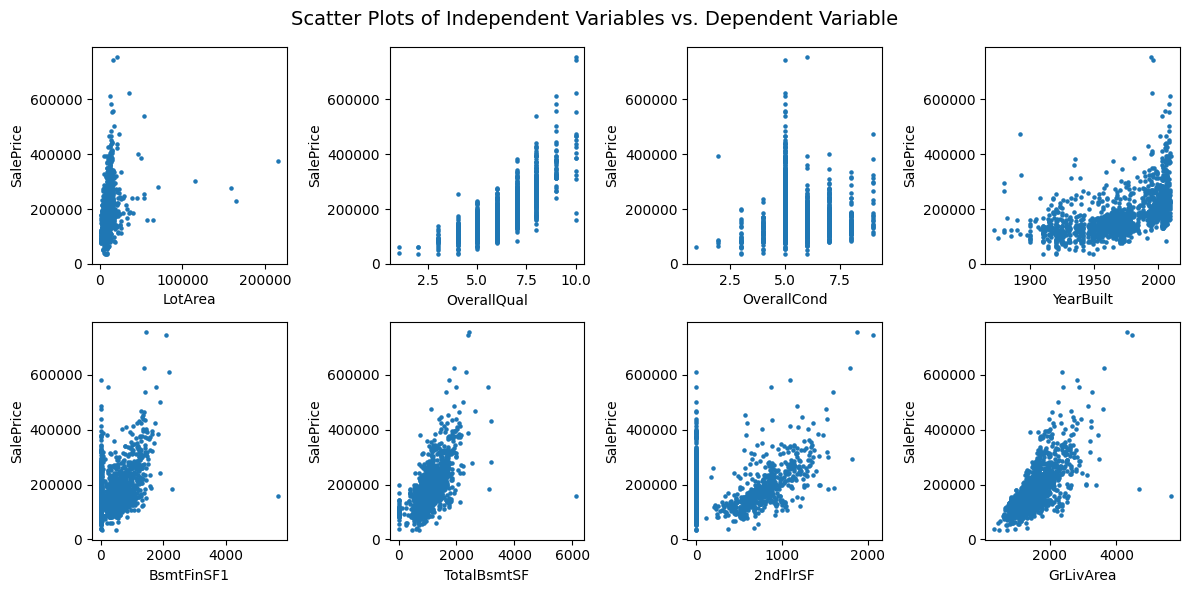

In [33]:
# Create a list of continuous variables which will be used to check the model assumption
continuous_var = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))  # Create a 2x4 subplot grid with a total of 8 subplots
axes = axes.flatten()

# Create a scatter plot for each independent variable against the dependent variable
for i, col in enumerate(continuous_var):
    ax = axes[i]  # Get the current axes
    ax.scatter(df[col], df['SalePrice'], s=5)  # Create a scatter plot of the current independent variable against the dependent variable
    ax.set_xlabel(col)  # Set the x-axis label to the name of the current independent variable
    ax.set_ylabel('SalePrice')  # Set the y-axis label to the name of the dependent variable

# Add a title and adjust layout
plt.suptitle('Scatter Plots of Independent Variables vs. Dependent Variable', fontsize=14)
plt.tight_layout()
plt.show()

No patterns of non-linear relationship are found, the linear assumptions are met.

**Independence of errors**

To check the assumption of indepence of errors, we need to build a multi-variate linear model with the original data.

In [34]:
# Copy a data frame with the significant variables
# The 6 categorical variables are LandSlope, Neighborhood, Condition2, RoofMalt, KitchenQual, and GarageQual.
# The 8 continous variables are LotArea, OverallQual, OverallCond, YearBuilt, BsmtFinSF1, TotalBsmtSF, 2ndFlrSF, GrLivArea
# The dependent variable is SalePrice
categorical_var = ['LandSlope', 'Neighborhood', 'Condition2', 'RoofMatl', 'KitchenQual', 'GarageQual']
continuous_var = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea']
dependent_var = ["SalePrice", "Log_SalePrice"]

# Combine the three groups of variables
selected_var = categorical_var + continuous_var + dependent_var

# Make a shorterned copy of the data table with the selected variables
df_copy_selected_var = df[selected_var]

df_copy_selected_var

LandSlope Neighborhood Condition2 RoofMatl KitchenQual GarageQual  \
0          Gtl      CollgCr       Norm  CompShg          Gd         TA   
1          Gtl      Veenker       Norm  CompShg          TA         TA   
2          Gtl      CollgCr       Norm  CompShg          Gd         TA   
3          Gtl      Crawfor       Norm  CompShg          Gd         TA   
4          Gtl      NoRidge       Norm  CompShg          Gd         TA   
...        ...          ...        ...      ...         ...        ...   
1455       Gtl      Gilbert       Norm  CompShg          TA         TA   
1456       Gtl       NWAmes       Norm  CompShg          TA         TA   
1457       Gtl      Crawfor       Norm  CompShg          Gd         TA   
1458       Gtl        NAmes       Norm  CompShg          Gd         TA   
1459       Gtl      Edwards       Norm  CompShg          TA         TA   

      LotArea  OverallQual  OverallCond  YearBuilt  BsmtFinSF1  TotalBsmtSF  \
0        8450            7            5       2003         706          856   
1        9600            6            8       1976         978         1262   
2       11250            7            5       2001         486          920   
3        9550            7            5       1915         216          756   
4       14260            8            5       2000         655         1145   
...       ...          ...          ...        ...         ...          ...   
1455     7917            6            5       1999           0          953   
1456    13175            6            6       1978         790         1542   
1457     9042            7            9       1941         275         1152   
1458     9717            5            6       1950          49         1078   
1459     9937            5            6       1965         830         1256   

      2ndFlrSF  GrLivArea  SalePrice  Log_SalePrice  
0          854       1710     208500      12.247694  
1            0       1262     181500      12.109011  
2          866       1786     223500      12.317167  
3          756       1717     140000      11.849398  
4         1053       2198     250000      12.429216  
...        ...        ...        ...            ...  
1455       694       1647     175000      12.072541  
1456         0       2073     210000      12.254863  
1457      1152       2340     266500      12.493130  
1458         0       1078     142125      11.864462  
1459         0       1256     147500      11.901583  

[1460 rows x 16 columns]

In [35]:
# convert the categorical variables to boolean
df_copy_selected_var = pd.get_dummies(df_copy_selected_var, columns=categorical_var)
df_copy_selected_var

LotArea  OverallQual  OverallCond  YearBuilt  BsmtFinSF1  TotalBsmtSF  \
0        8450            7            5       2003         706          856   
1        9600            6            8       1976         978         1262   
2       11250            7            5       2001         486          920   
3        9550            7            5       1915         216          756   
4       14260            8            5       2000         655         1145   
...       ...          ...          ...        ...         ...          ...   
1455     7917            6            5       1999           0          953   
1456    13175            6            6       1978         790         1542   
1457     9042            7            9       1941         275         1152   
1458     9717            5            6       1950          49         1078   
1459     9937            5            6       1965         830         1256   

      2ndFlrSF  GrLivArea  SalePrice  Log_SalePrice  LandSlope_Gtl  \
0          854       1710     208500      12.247694              1   
1            0       1262     181500      12.109011              1   
2          866       1786     223500      12.317167              1   
3          756       1717     140000      11.849398              1   
4         1053       2198     250000      12.429216              1   
...        ...        ...        ...            ...            ...   
1455       694       1647     175000      12.072541              1   
1456         0       2073     210000      12.254863              1   
1457      1152       2340     266500      12.493130              1   
1458         0       1078     142125      11.864462              1   
1459         0       1256     147500      11.901583              1   

      LandSlope_Mod  LandSlope_Sev  Neighborhood_Blmngtn  \
0                 0              0                     0   
1                 0              0                     0   
2                 0              0                     0   
3                 0              0                     0   
4                 0              0                     0   
...             ...            ...                   ...   
1455              0              0                     0   
1456              0              0                     0   
1457              0              0                     0   
1458              0              0                     0   
1459              0              0                     0   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                        0                    0                     0   
1                        0                    0                     0   
2                        0                    0                     0   
3                        0                    0                     0   
4                        0                    0                     0   
...                    ...                  ...                   ...   
1455                     0                    0                     0   
1456                     0                    0                     0   
1457                     0                    0                     0   
1458                     0                    0                     0   
1459                     0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                        0                     1                     0   
1                        0                     0                     0   
2                        0                     1                     0   
3                        0                     0                     1   
4                        0                     0                     0   
...                    ...                   ...                   ...   
1455                     0                     0                     0   
1456                     0

In [36]:


# Create the X and Y for regression analysis
X = df_copy_selected_var.drop('SalePrice', axis=1)
X = X.drop('Log_SalePrice', axis=1)
Y1 = df_copy_selected_var['SalePrice']
Y2 = df_copy_selected_var['Log_SalePrice']

#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model1 = sm.OLS(Y1, X).fit()

#view model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     186.1
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:23:58   Log-Likelihood:                -16988.
No. Observations:                1460   AIC:                         3.409e+04
Df Residuals:                    1403   BIC:                         3.439e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -6.107e+05 

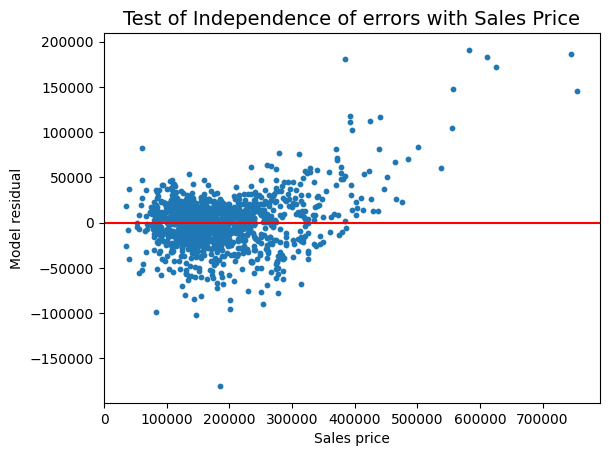

In [37]:
# plot the residual against the Y
plt.scatter(Y1, model1.resid, s=10)
plt.axhline(y=0, color='red', linestyle='-')
# Add labels and title
plt.xlabel("Sales price")
plt.ylabel('Model residual')
plt.title('Test of Independence of errors with Sales Price', fontsize=14)

# Show the plot
plt.show()
# We do find a trend of increased residual with Y increases.

In [38]:
#fit linear regression model
model2 = sm.OLS(Y2, X).fit()

#view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          Log_SalePrice   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     235.7
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:24:26   Log-Likelihood:                 978.80
No. Observations:                1460   AIC:                            -1844.
Df Residuals:                    1403   BIC:                            -1542.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1720 

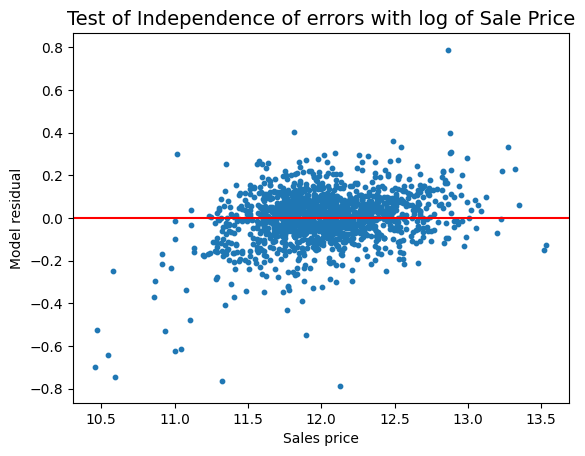

In [39]:
# plot the residual against the Y
plt.scatter(Y2, model2.resid, s=10)
plt.axhline(y=0, color='red', linestyle='-')

# Add labels and title
plt.xlabel("Sales price")
plt.ylabel('Model residual')
plt.title('Test of Independence of errors with log of Sale Price', fontsize=14)

# Show the plot
plt.show()
# We do find a trend of increased residual with Y increases.

Conclusions: Using the log of housing prices as the dependent variable, we saw both an increase in the indepence of errors, and a slight increase of R2 (from 0.881 to 0.904

**Normality of errors**: The errors are normally distributed, meaning that the distribution of the errors follows a bell-shaped normal distribution.

In [40]:
# Plot the dependent variable - the housing prices
from scipy import stats
plt.hist(model2.resid, bins=50, color='blue', alpha=0.8)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu = np.mean(X, axis=0)
std = np.std(X, axis=0)
#p = stats.norm.pdf(x, mu, std)

#plt.plot(x, p, 'k', linewidth=2)
#title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.xlabel('Residual of Model2')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.title('Histogram of Residual of Model2 - Log of Sales Price')  # Title of the plot
plt.show()

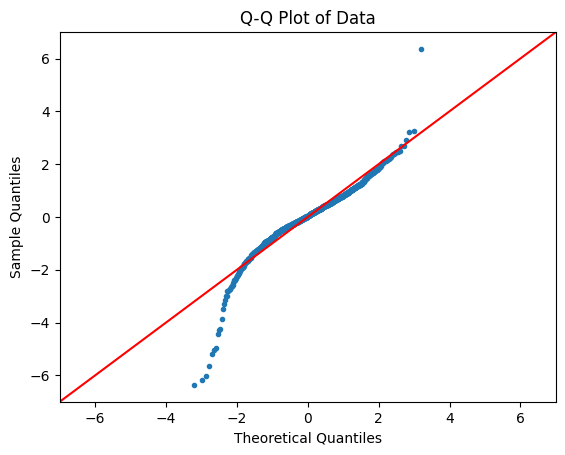

In [41]:
# Create a Q-Q plot of housing prices
sm.qqplot(model2.resid, line='45', fit=True, ms = 3)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Data')
plt.show()

The plot shows that mostly the model is normally distributed, except for the part where theoretical quantiles is smaller than -2.

**Homoscedasticity**: The errors have constant variance across all levels of the independent variables, meaning that the variability of the errors is the same for all values of the independent variables.

Source: https://pythonfordatascienceorg.wordpress.com/linear-regression-python/

In [42]:
# We use the residual plot for the Homoscedasticity

# plot the residual against the Y
plt.scatter(model2.fittedvalues, model2.resid, s=10)

# Add labels and title
plt.xlabel("Fitted Values")
plt.ylabel('Model Residual')
plt.title('Test of Homoscedasticity', fontsize=14)

# Show the plot
plt.show()
# We do find a trend of increased residual with Y increases.

This can be tested using a residual vs. fitted values plot, looking at a scatter plot (if a cone shape is present then heteroscedasticity is present), or by using a statistical test such as Bruesch-Pagan, Cook-Weisberg test, or White general test. In the following part, we will use Bruesch-Pagan test.

In [43]:
# Source: https://pythonfordatascienceorg.wordpress.com/linear-regression-python/
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 698.9378380303989),
 ('p-value', 1.6745333387043316e-33),
 ('f-value', 4.137870308648929),
 ('f p-value', 1.2817832564187595e-63)]

We found a ‘p-value’ of 5.657872206859211e-81, which indicates that our model violates the homoscedasticity assumption. To address the heterostatisticity, we should either transform the **dependent variable** or use a robust regression model.

Source: https://towardsdatascience.com/heteroscedasticity-in-regression-model-21d9f5a93e59#:~:text=Fix%20for%20heteroscedasticity&text=The%20scattering%20should%20be%20random,the%20dependent%20variable%20%5B2%5D.

Although there is a potential heteroscedasticity issue in the model, our model will remain unchanged.

**Multicollinearity**: There is no perfect or near-perfect linear relationship among the independent variables, as this can cause issues in estimating the regression coefficients and interpreting their effects.

Note that the coviriance matrix are moved to this part

In [45]:
import seaborn as sns
# Load significant continuous variables
covariance_data = df[continuous_var]

# Normalize the data
covariance_data_norm = (covariance_data - covariance_data.mean())/covariance_data.std()

# Calculate correlation matrix
corr_matrix = covariance_data_norm.corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the covariance matrix, we observe that highly correlated variables, including: YearBuilt (Year Built), TotalBsmtSF (Total Basement Square Footage), and GRLiveArea (Above Grond Living Area), OverallCond (Overall Condition), BsmtFinSF1 (Type 1 finished square feet), 2ndFlrSF (second floor areas)

As the total square footage can be replaced by basement area plus the above ground floor squarefootage and 2nd floor square footage, we propose to eliminate the BsmtFinSF1 (Type 1 finished square feet), which lead to the following coviriance matrix.

In [46]:

# Load significant continuous variables
new_continuous = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea']

covariance_data = df[new_continuous]

# Normalize the data
covariance_data_norm = (covariance_data - covariance_data.mean())/covariance_data.std()

# Calculate correlation matrix
corr_matrix = covariance_data_norm.corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Final Correlation Matrix')
plt.show()

**3.3 The EDA Step**

Checking the distribution of the selected variables
['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea']

LotArea: Lot size in square feet

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

YearBuilt: Original construction date

TotalBsmtSF: Total square feet of basement area

2ndFlrSF: Second floor square feet

GrLivArea: Above grade (ground) living area square feet

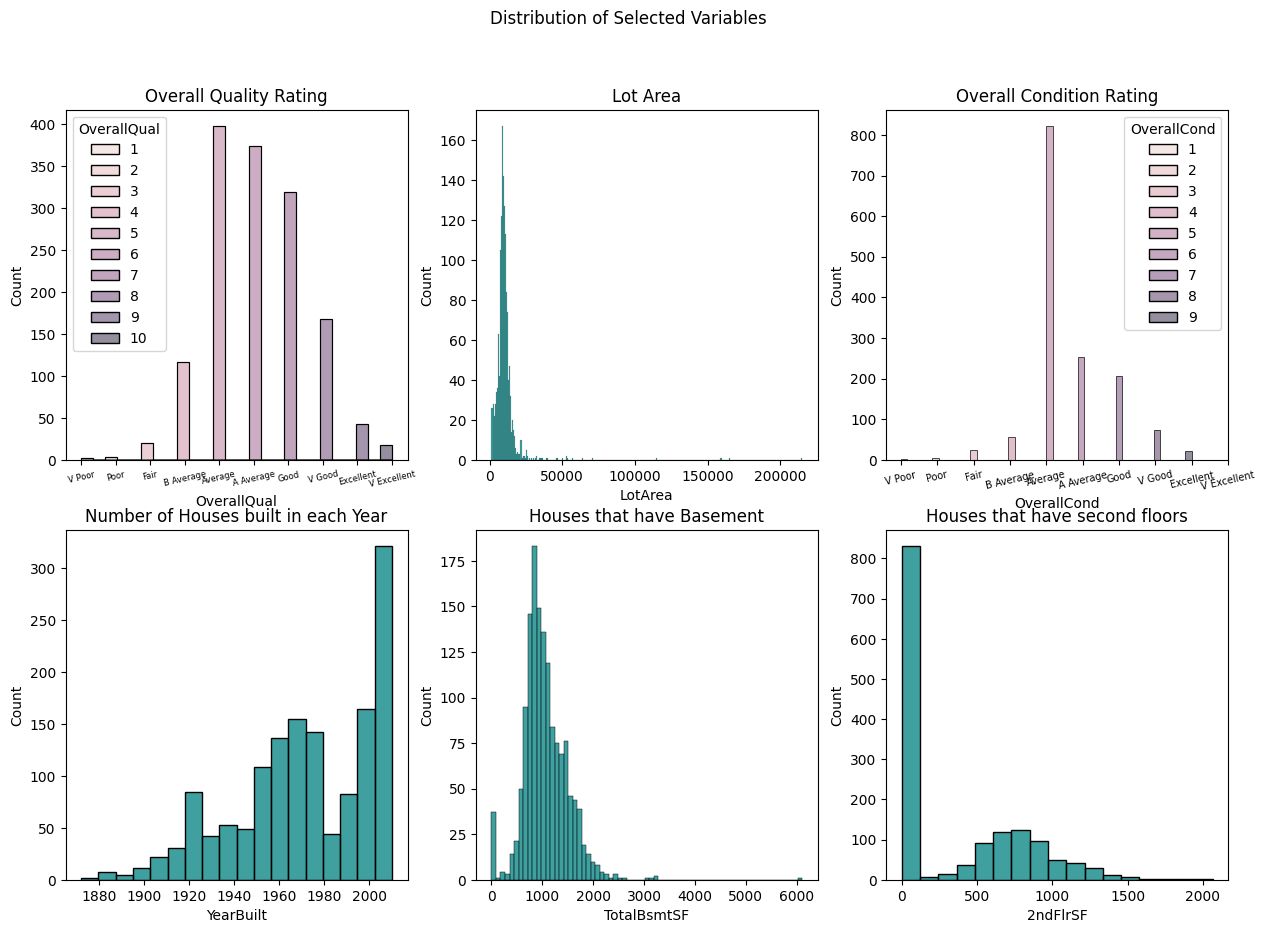

In [47]:
fig = plt.figure(figsize = (15,10))
fig.suptitle("Distribution of Selected Variables")
sns.set_palette("colorblind")

ax1 = fig.add_subplot(2,3,1)
sns.histplot(data = df ,x = 'OverallQual', color = 'navy', hue='OverallQual')
plt.xticks((1, 2, 3, 4, 5, 6 ,7 , 8, 9, 10), ('V Poor', 'Poor', 'Fair', 'B Average', 'Average', 'A Average', 'Good', 'V Good', 'Excellent', 'V Excellent'), rotation= 13)
plt.xticks(fontsize=6)

ax2 = fig.add_subplot(2,3,2)
sns.histplot(data = df, x = 'LotArea', ax=ax2, color="teal")

ax3 = fig.add_subplot(2,3,3)
sns.histplot(data = df ,x = 'OverallCond', color = 'navy', hue= 'OverallCond')
plt.xticks((1, 2, 3, 4, 5, 6 ,7 , 8, 9, 10), ('V Poor', 'Poor', 'Fair', 'B Average', 'Average', 'A Average', 'Good', 'V Good', 'Excellent', 'V Excellent'),  rotation = 13)
plt.xticks(fontsize=7)

ax4 = fig.add_subplot(2,3,4)
sns.histplot(data = df, x = 'YearBuilt', ax=ax4, color ="teal")

ax5 = fig.add_subplot(2,3,5)
sns.histplot(data = df, x = 'TotalBsmtSF', ax=ax5, color= "teal")


ax6 = fig.add_subplot(2,3,6)
sns.histplot(data = df, x = '2ndFlrSF',  ax=ax6, color = "teal")

ax1.title.set_text('Overall Quality Rating')
ax2.title.set_text('Lot Area')
ax3.title.set_text('Overall Condition Rating')
ax4.title.set_text('Number of Houses built in each Year')
ax5.title.set_text('Houses that have Basement')
ax6.title.set_text('Houses that have second floors')


In [48]:
df_copy_selected_var

LotArea  OverallQual  OverallCond  YearBuilt  BsmtFinSF1  TotalBsmtSF  \
0        8450            7            5       2003         706          856   
1        9600            6            8       1976         978         1262   
2       11250            7            5       2001         486          920   
3        9550            7            5       1915         216          756   
4       14260            8            5       2000         655         1145   
...       ...          ...          ...        ...         ...          ...   
1455     7917            6            5       1999           0          953   
1456    13175            6            6       1978         790         1542   
1457     9042            7            9       1941         275         1152   
1458     9717            5            6       1950          49         1078   
1459     9937            5            6       1965         830         1256   

      2ndFlrSF  GrLivArea  SalePrice  Log_SalePrice  LandSlope_Gtl  \
0          854       1710     208500      12.247694              1   
1            0       1262     181500      12.109011              1   
2          866       1786     223500      12.317167              1   
3          756       1717     140000      11.849398              1   
4         1053       2198     250000      12.429216              1   
...        ...        ...        ...            ...            ...   
1455       694       1647     175000      12.072541              1   
1456         0       2073     210000      12.254863              1   
1457      1152       2340     266500      12.493130              1   
1458         0       1078     142125      11.864462              1   
1459         0       1256     147500      11.901583              1   

      LandSlope_Mod  LandSlope_Sev  Neighborhood_Blmngtn  \
0                 0              0                     0   
1                 0              0                     0   
2                 0              0                     0   
3                 0              0                     0   
4                 0              0                     0   
...             ...            ...                   ...   
1455              0              0                     0   
1456              0              0                     0   
1457              0              0                     0   
1458              0              0                     0   
1459              0              0                     0   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                        0                    0                     0   
1                        0                    0                     0   
2                        0                    0                     0   
3                        0                    0                     0   
4                        0                    0                     0   
...                    ...                  ...                   ...   
1455                     0                    0                     0   
1456                     0                    0                     0   
1457                     0                    0                     0   
1458                     0                    0                     0   
1459                     0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                        0                     1                     0   
1                        0                     0                     0   
2                        0                     1                     0   
3                        0                     0                     1   
4                        0                     0                     0   
...                    ...                   ...                   ...   
1455                     0                     0                     0   
1456                     0

In [49]:
dep_var = df_copy_selected_var[["SalePrice","Log_SalePrice"]]
dep_var

SalePrice  Log_SalePrice
0        208500      12.247694
1        181500      12.109011
2        223500      12.317167
3        140000      11.849398
4        250000      12.429216
...         ...            ...
1455     175000      12.072541
1456     210000      12.254863
1457     266500      12.493130
1458     142125      11.864462
1459     147500      11.901583

[1460 rows x 2 columns]

In [50]:
fig = plt.figure(figsize = (15,10))
fig.suptitle("Distribution of Supervisor")
sns.set_palette("colorblind")



<Figure size 1500x1000 with 0 Axes>

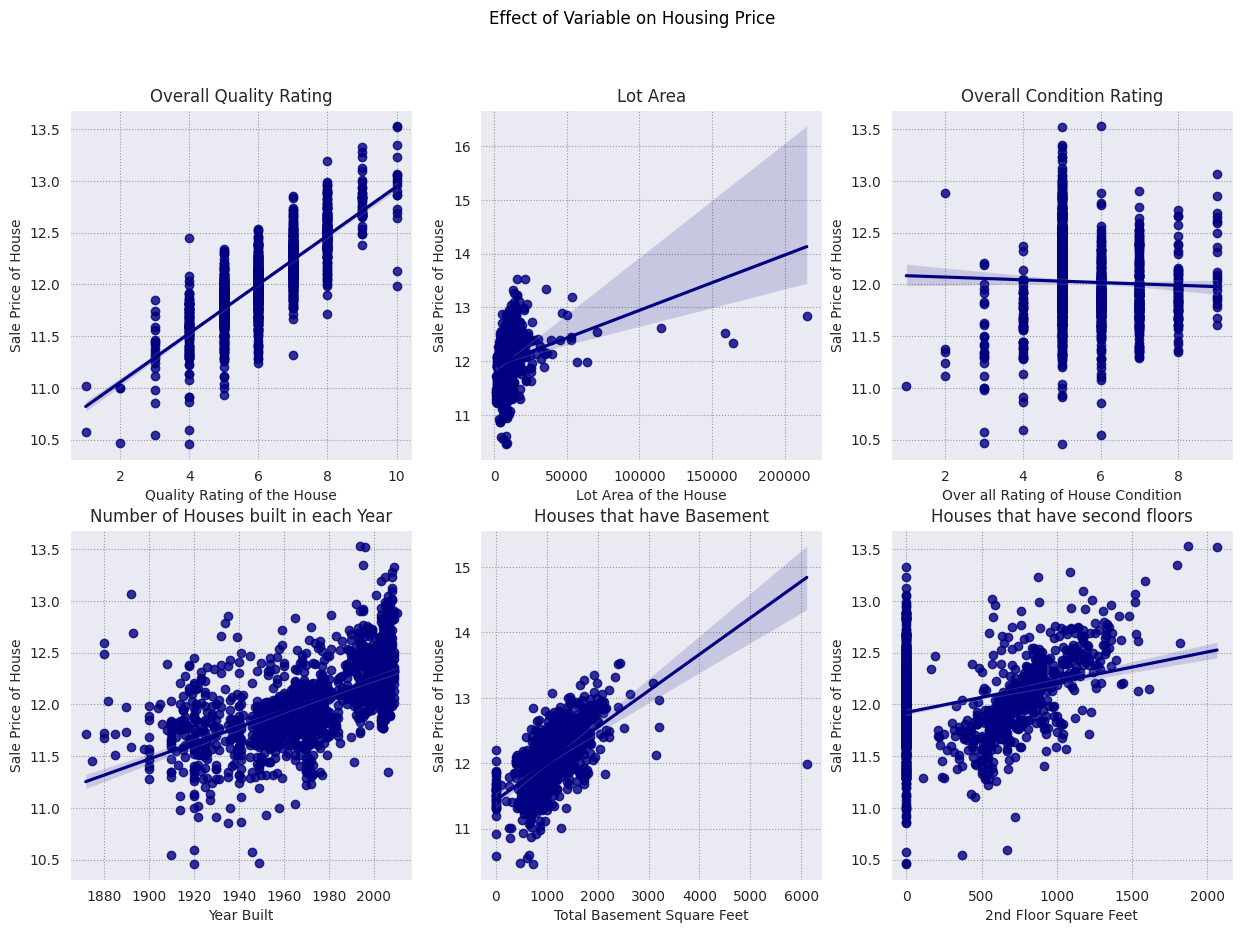

In [51]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Effect of Variable on Housing Price')

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

ax1=fig.add_subplot(2,3,1)
sns.regplot(x= df_copy_selected_var['OverallQual'], y= dep_var['Log_SalePrice'], color='navy')
plt.ylabel('Sale Price of House')
plt.xlabel('Quality Rating of the House')

ax2=fig.add_subplot(2,3,2)
sns.regplot(x= df_copy_selected_var['LotArea'], y= dep_var['Log_SalePrice'], color = 'navy')
plt.ylabel('Sale Price of House')
plt.xlabel('Lot Area of the House')

ax3=fig.add_subplot(2,3,3)
sns.regplot(x= df_copy_selected_var['OverallCond'], y= dep_var['Log_SalePrice'], color = 'navy')
plt.ylabel('Sale Price of House')
plt.xlabel('Over all Rating of House Condition')

ax4=fig.add_subplot(2,3,4)
sns.regplot(x= df_copy_selected_var['YearBuilt'], y= dep_var['Log_SalePrice'], color = 'navy')
plt.ylabel('Sale Price of House')
plt.xlabel('Year Built')

ax5=fig.add_subplot(2,3,5)
sns.regplot(x = df_copy_selected_var['TotalBsmtSF'], y =dep_var['Log_SalePrice'], color= 'navy')
plt.ylabel('Sale Price of House')
plt.xlabel('Total Basement Square Feet')

ax6=fig.add_subplot(2,3,6)
sns.regplot(x = df_copy_selected_var['2ndFlrSF'], y =dep_var['Log_SalePrice'], color= 'navy')
plt.ylabel('Sale Price of House')
plt.xlabel('2nd Floor Square Feet')

ax1.title.set_text('Overall Quality Rating')
ax2.title.set_text('Lot Area')
ax3.title.set_text('Overall Condition Rating')
ax4.title.set_text('Number of Houses built in each Year')
ax5.title.set_text('Houses that have Basement')
ax6.title.set_text('Houses that have second floors')

plt.show()

**3.3 The Final Model**

Weighted Least Squares (WLS): WLS is a modification of ordinary least squares (OLS) that accounts for the unequal variances of errors by assigning different weights to observations based on their estimated variances. In WLS, observations with larger errors (higher variances) are given smaller weights, and observations with smaller errors (lower variances) are given larger weights. This gives more importance to observations with smaller errors, which helps to mitigate the impact of heteroscedasticity on the regression estimates.

In [53]:

# Generate example data
new_continuous = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea']
categorical_var = ['LandSlope', 'Neighborhood', 'Condition2', 'RoofMatl', 'KitchenQual', 'GarageQual']

# Create a copy of the new variables (eliminating the BsmtFinSF1)
combined_var = new_continuous + categorical_var
df_copy = df[combined_var]

df_copy = pd.get_dummies(df_copy, columns=categorical_var)

X = df_copy
Y = df['Log_SalePrice']  # true relationship with heteroscedastic errors

# Fit Huber regression model
model3 = HuberRegressor(epsilon=1.35)  # specify the tuning parameter epsilon
model3.fit(X, Y)

# Get predicted values
y_pred = model3.predict(X)

X = sm.add_constant(X)  # add constant term to predictor variable
model_ols = sm.OLS(Y, X).fit()  # fit OLS model for p-values

# Print estimated coefficients
summary = model_ols.summary()
summary

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Log_SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     222.1
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:28:36   Log-Likelihood:                 927.30
No. Observations:                1460   AIC:                            -1743.
Df Residuals:                    1404   BIC:                            -1447.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.9686      0.295      6.666      0.000       1.389       2.548
LotArea               3.466e-06   4.82e-07      7.194      0.000    2.52e-06    4.41e-06
OverallQual              0.0625      0.005     13.034      0.000       0.053       0.072
OverallCond              0.0551      0.004     14.927      0.000       0.048       0.062
YearBuilt                0.0033      0.000     11.772      0.000       0.003       0.004
TotalBsmtSF              0.0002   1.55e-05     10.533      0.000       0.000       0.000
2ndFlrSF             -3.517e-06    1.8e-05     -0.195      0.845   -3.89e-05    3.18e-05
GrLivArea                0.0003   1.71e-05     16.535      0.000       0.000       0.000
LandSlope_Gtl            0.6903      0.100      6.912      0.000       0.494       0.886
LandSlope_Mod            0.7245      0.100      7.213      0.000       0.527       0.922
LandSlope_Sev            0.5538      0.105      5.299      0.000       0.349       0.759
Neighborhood_Blmngtn     0.0640      0.036      1.758      0.079      -0.007       0.135
Neighborhood_Blueste    -0.0138      0.091     -0.152      0.879      -0.191       0.164
Neighborhood_BrDale     -0.1297      0.035     -3.732      0.000      -0.198      -0.062
Neighborhood_BrkSide     0.0884      0.019      4.624      0.000       0.051       0.126
Neighborhood_ClearCr     0.1449      0.030      4.875      0.000       0.087       0.203
Neighborhood_CollgCr     0.1010      0.021      4.830      0.000       0.060       0.142
Neighborhood_Crawfor     0.2127      0.020     10.439      0.000       0.173       0.253
Neighborhood_Edwards     0.0343      0.017      2.016      0.044       0.001       0.068
Neighborhood_Gilbert     0.1096      0.024      4.553      0.000       0.062       0.157
Neighborhood_IDOTRR     -0.0656      0.023     -2.913      0.004      -0.110      -0.021
Neighborhood_MeadowV    -0.1041      0.035     -3.005      0.003      -0.172      -0.036
Neighborhood_Mitchel     0.0663      0.024      2.735      0.006       0.019       0.114
Neighborhood_NAmes       0.0685      0.014      4.740      0.000       0.040       0.097
Neighborhood_NPkVill     0.0435      0.044      0.979      0.328      -0.044       0.131
Neighborhood_NWAmes      0.0614      0.021      2.921      0.004       0.020       0.103
Neighborhood_NoRidge     0.1708      0.028      6.110      0.000       0.116       0.226
Neighborhood_NridgHt     0.2041      0.025      8.098      0.000       0.155       0.254
Neighborhood_OldTown     0.0050      0.015      0.335      0.738      -0.024       0.034
Neighborhood_SWISU       0.0689      0.027      2.572      0.010       0.016       0.122
Neighborhood_Sawyer      0.0629      0.020      3.187      0.001       0.024       0.102
Neighborhood_SawyerW     0.0792      0.023      3.406    

In [54]:
mse = model_ols.mse_resid
print(mse)

0.01709384569351249


In [55]:
Y = df['Log_SalePrice']  # true relationship with heteroscedastic errors

# Fit Huber regression model
model3 = HuberRegressor(epsilon=1.35)  # specify the tuning parameter epsilon
model3.fit(X, Y)

# Get predicted values
y_pred = model3.predict(X)

X = sm.add_constant(X)  # add constant term to predictor variable
model_ols = sm.OLS(Y, X).fit()  # fit OLS model for p-values

# Print estimated coefficients
summary = model_ols.summary()
summary

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Log_SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     222.1
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        23:28:53   Log-Likelihood:                 927.30
No. Observations:                1460   AIC:                            -1743.
Df Residuals:                    1404   BIC:                            -1447.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.9686      0.295      6.666      0.000       1.389       2.548
LotArea               3.466e-06   4.82e-07      7.194      0.000    2.52e-06    4.41e-06
OverallQual              0.0625      0.005     13.034      0.000       0.053       0.072
OverallCond              0.0551      0.004     14.927      0.000       0.048       0.062
YearBuilt                0.0033      0.000     11.772      0.000       0.003       0.004
TotalBsmtSF              0.0002   1.55e-05     10.533      0.000       0.000       0.000
2ndFlrSF             -3.517e-06    1.8e-05     -0.195      0.845   -3.89e-05    3.18e-05
GrLivArea                0.0003   1.71e-05     16.535      0.000       0.000       0.000
LandSlope_Gtl            0.6903      0.100      6.912      0.000       0.494       0.886
LandSlope_Mod            0.7245      0.100      7.213      0.000       0.527       0.922
LandSlope_Sev            0.5538      0.105      5.299      0.000       0.349       0.759
Neighborhood_Blmngtn     0.0640      0.036      1.758      0.079      -0.007       0.135
Neighborhood_Blueste    -0.0138      0.091     -0.152      0.879      -0.191       0.164
Neighborhood_BrDale     -0.1297      0.035     -3.732      0.000      -0.198      -0.062
Neighborhood_BrkSide     0.0884      0.019      4.624      0.000       0.051       0.126
Neighborhood_ClearCr     0.1449      0.030      4.875      0.000       0.087       0.203
Neighborhood_CollgCr     0.1010      0.021      4.830      0.000       0.060       0.142
Neighborhood_Crawfor     0.2127      0.020     10.439      0.000       0.173       0.253
Neighborhood_Edwards     0.0343      0.017      2.016      0.044       0.001       0.068
Neighborhood_Gilbert     0.1096      0.024      4.553      0.000       0.062       0.157
Neighborhood_IDOTRR     -0.0656      0.023     -2.913      0.004      -0.110      -0.021
Neighborhood_MeadowV    -0.1041      0.035     -3.005      0.003      -0.172      -0.036
Neighborhood_Mitchel     0.0663      0.024      2.735      0.006       0.019       0.114
Neighborhood_NAmes       0.0685      0.014      4.740      0.000       0.040       0.097
Neighborhood_NPkVill     0.0435      0.044      0.979      0.328      -0.044       0.131
Neighborhood_NWAmes      0.0614      0.021      2.921      0.004       0.020       0.103
Neighborhood_NoRidge     0.1708      0.028      6.110      0.000       0.116       0.226
Neighborhood_NridgHt     0.2041      0.025      8.098      0.000       0.155       0.254
Neighborhood_OldTown     0.0050      0.015      0.335      0.738      -0.024       0.034
Neighborhood_SWISU       0.0689      0.027      2.572      0.010       0.016       0.122
Neighborhood_Sawyer      0.0629      0.020      3.187      0.001       0.024       0.102
Neighborhood_SawyerW     0.0792      0.023      3.406    

In [56]:
mse = model_ols.mse_resid
print(mse)

0.01709384569351249


<ipython-input-57-098bfb6645aa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y, hist=False, color="red", label="Actual Value")
<ipython-input-57-098bfb6645aa>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="blue", label="Fitted Values" , ax

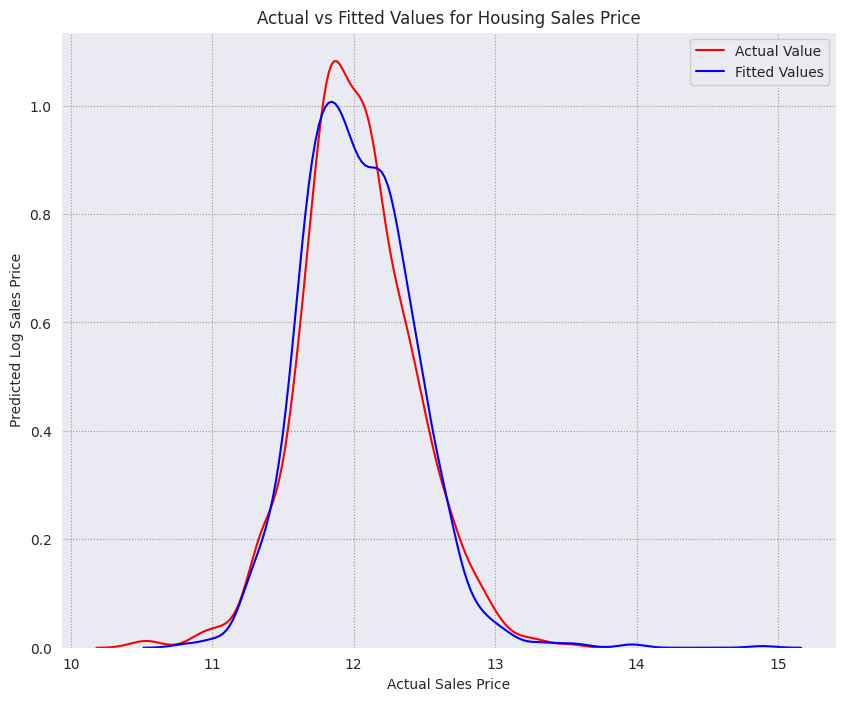

In [57]:
plt.figure(figsize=(10, 8))


ax1 = sns.distplot(Y, hist=False, color="red", label="Actual Value")
sns.distplot(y_pred, hist=False, color="blue", label="Fitted Values" , ax=ax1)

plt.legend(framealpha=1, frameon=True);
plt.title('Actual vs Fitted Values for Housing Sales Price')
plt.xlabel('Actual Sales Price')
plt.ylabel('Predicted Log Sales Price')

plt.show()
plt.close()

In [58]:
plt.figure(figsize=(10, 8))
x= Y
y =y_pred
plt.scatter(x, y, color='red')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='k', lw=3, scalex=False, scaley=False)

plt.title("Line of best fit for Predicted Values")
plt.xlabel("Actual Values of Log Sale Price")
plt.ylabel("Predicted Values of Log Sale Price")


Text(0, 0.5, 'Predicted Values of Log Sale Price')

In [59]:
MSE = mean_squared_error(Y,y_pred)
MSE
print('\033[1m' + "Mean Square Error:", round(MSE,4))

Mean Square Error: 0.0295


In [60]:
RMSE = math.sqrt(MSE)
print('\033[1m' + "Root Mean Square Error:", round(RMSE,4))


Root Mean Square Error: 0.1718


**Conclusion**

**Without the BsmtFinSF1 and changing the model to a Robust Model (HuberRegressor), the model performance was almost unhurt.**

# Step 4: Alternative Models
**4.1 Linear Model with PCA**

Principal Component Analysis (PCA)


PCA is a technique to reduce dimensionality and account for colinearity. It finds patterns in the data by extracting the linear combinations of variables that explain the most variation in the data. We do PCA by calculating the eigenvectors of the covariance matrix of a dataset.

To perform PCA, we need three major steps.

1. Combine the training data and testing data.

2. Normalize the dataset and use matrix transformation to calculate the principle components (calculate the Eigenvectors of the covariance matrix).

3. Use different number of dimensions in the principle components to test the linear model performance on training dataset.

Note: when we use the PCA, we make two sacrafices. First, we cannot explicitly explain the association between any specific variables and the dependent variable. Second, we will only focus on the continuous variable, as PCA is based on the covariance matrix.

In [61]:
# Use the combination of factors select by LEAP package to run linear regression
test_raw = pd.read_csv('/content/STAT654/test.csv')
train_raw = pd.read_csv('/content/STAT654/train.csv')

In [62]:
# Step 1: Combine the Training and Testing dataset.
# Concatenate vertically
df_concat = pd.concat([test_raw, train_raw], axis=0)

In [63]:
# check the dimensionality
print(test_raw.shape, train_raw.shape, df_concat.shape)

(1459, 80) (1460, 81) (2919, 81)


In [64]:
# after the data has been merged, we could still split the dataset with the following code
print(df_concat[:1459].shape)
print(df_concat[1459:].shape)
print(df_concat[1459:])

(1459, 81)
(1460, 81)
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities Lo

In [65]:
# Step 2: Normalize the data and compute the principle components.
# Set the Id and MSSubClass as string
df_concat['Id'] = df_concat['Id'].astype(str)
df_concat['MSSubClass'] = df_concat['MSSubClass'].astype(str)

# we don't want the housing price and log housing prices to be normalized
df_concat['Log_SalePrice'] = np.log(df_concat['SalePrice'])
df_concat['Log_SalePrice'] = df_concat['Log_SalePrice'].astype(str)
df_concat['SalePrice'] = df_concat['SalePrice'].astype(str)

# Select only numeric columns (float and integer columns)
num_cols = df_concat.select_dtypes(include=['float', 'int'])

# Perform Z-score normalization on numeric columns
num_cols_normalized = (num_cols - num_cols.mean()) / num_cols.std()

# Replace the original numeric columns with normalized values
df_concat[num_cols_normalized.columns] = num_cols_normalized

# print the normalized dataframe
print(df_concat)

        Id MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0     1461         20       RH     0.458096  0.184340   Pave   NaN      Reg   
1     1462         20       RL     0.500932  0.519702   Pave   NaN      IR1   
2     1463         60       RL     0.201080  0.464294   Pave   NaN      IR1   
3     1464         60       RL     0.372424 -0.024105   Pave   NaN      IR1   
4     1465        120       RL    -1.126832 -0.654636   Pave   NaN      IR1   
...    ...        ...      ...          ...       ...    ...   ...      ...   
1455  1456         60       RL    -0.312950 -0.285421   Pave   NaN      Reg   
1456  1457         20       RL     0.672275  0.381246   Pave   NaN      Reg   
1457  1458         70       RL    -0.141607 -0.142781   Pave   NaN      Reg   
1458  1459         20       RL    -0.055935 -0.057197   Pave   NaN      Reg   
1459  1460         20       RL     0.243916 -0.029303   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neig

In [66]:
# Display the original DataFrame
categorical_var = ['LandSlope', 'Neighborhood', 'Condition2', 'RoofMatl', 'KitchenQual', 'GarageQual']

df_dummy = df[categorical_var]

# Convert string column to dummy variables
df_dummy = pd.get_dummies(df_dummy, columns=categorical_var)
df_dummy.fillna(0, inplace=True)
print("df_dummy:")
print(df_dummy)

df_dummy:
      LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blmngtn  \
0                 1              0              0                     0   
1                 1              0              0                     0   
2                 1              0              0                     0   
3                 1              0              0                     0   
4                 1              0              0                     0   
...             ...            ...            ...                   ...   
1455              1              0              0                     0   
1456              1              0              0                     0   
1457              1              0              0                     0   
1458              1              0              0                     0   
1459              1              0              0                     0   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0               

In [67]:
# Step 3: Use different number of dimensions in the principle components to test the linear model performance on training dataset..

import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# run regression on number of 1, 2, 3, 4, 5, 6 principle components
for num in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
  # Selected the normalized continuous variables
  PCA_origin = df_concat.select_dtypes(include=['float', 'int'])
  PCA_origin = np.nan_to_num(PCA_origin, nan=0)
  # Create a PCA object with corresponding principal components
  pca = PCA(n_components=num)
  # Fit the PCA model to the data and transform the data to the new space
  PCA_destination = pca.fit_transform(PCA_origin)
  print("PCA with " + str(num) + " dimensions model performance")
  train_pca = PCA_destination[1459:]
  #print(train_pca.shape)
  all_column = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10']
  train_pca = pd.DataFrame(train_pca, columns=all_column[:num])
  #print(df_dummy.shape)
  combined_pca = pd.concat([train_pca, df_dummy], axis=1)
  combined_pca.fillna(0, inplace=True)
  train_log_price = df_concat['Log_SalePrice'][1459:]
  reg = LinearRegression()
  reg.fit(combined_pca, train_log_price)
  y_pred = reg.predict(combined_pca)
  r2 = r2_score(train_log_price, y_pred)
  print("R^2 score:", r2)
  # Calculate the mean squared error
  mse = mean_squared_error(train_log_price, y_pred)
  print("MSE score:", mse)


PCA with 1 dimensions model performance
R^2 score: 0.8719146845130068
MSE score: 0.020423524556261157
PCA with 2 dimensions model performance
R^2 score: 0.8729791912441489
MSE score: 0.020253786290159972
PCA with 3 dimensions model performance
R^2 score: 0.8580906148764387
MSE score: 0.022627807105095453
PCA with 4 dimensions model performance
R^2 score: 0.8555951849971024
MSE score: 0.023025709653293695
PCA with 5 dimensions model performance
R^2 score: 0.8917797618295037
MSE score: 0.017255988193150898
PCA with 6 dimensions model performance
R^2 score: 0.8903774286262339
MSE score: 0.017479593736878893
PCA with 7 dimensions model performance
R^2 score: 0.7805735779897899
MSE score: 0.03498809290650601
PCA with 8 dimensions model performance
R^2 score: 0.8967536958772472
MSE score: 0.0164628819437805
PCA with 9 dimensions model performance
R^2 score: 0.8971781465196399
MSE score: 0.016395202225111212
PCA with 10 dimensions model performance
R^2 score: 0.8977654156956018
MSE score: 0.0

In [69]:
# Step 3: Use different number of dimensions in the principle components to test the linear model performance on training dataset..

import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# run regression on number of 1, 2, 3, 4, 5, 6 principle components
for num in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
  # Selected the normalized continuous variables
  PCA_origin = df_concat.select_dtypes(include=['float', 'int'])
  PCA_origin = np.nan_to_num(PCA_origin, nan=0)
  # Create a PCA object with corresponding principal components
  pca = PCA(n_components=num)
  # Fit the PCA model to the data and transform the data to the new space
  PCA_destination = pca.fit_transform(PCA_origin)
  print("PCA with " + str(num) + " dimensions model performance")
  train_pca = PCA_destination[1459:]
  #print(train_pca.shape)
  all_column = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10']
  train_pca = pd.DataFrame(train_pca, columns=all_column[:num])
  #print(df_dummy.shape)
  combined_pca = pd.concat([train_pca, df_dummy], axis=1)
  combined_pca.fillna(0, inplace=True)
  train_price = df_concat['SalePrice'][1459:]
  reg = LinearRegression()
  reg.fit(combined_pca, train_price)
  y_pred = reg.predict(combined_pca)
  r2 = r2_score(train_price, y_pred)
  print("R^2 score:", r2)
  # Calculate the mean squared error
  mse = mean_squared_error(train_price, y_pred)
  print("MSE score:", mse)

PCA with 1 dimensions model performance
R^2 score: 0.8590608071376625
MSE score: 888873692.7725333
PCA with 2 dimensions model performance
R^2 score: 0.8613014349931065
MSE score: 874742526.5898036
PCA with 3 dimensions model performance
R^2 score: 0.8645255224375118
MSE score: 854408888.6972603
PCA with 4 dimensions model performance
R^2 score: 0.8683353778478415
MSE score: 830380936.0835617
PCA with 5 dimensions model performance
R^2 score: 0.8740938805259351
MSE score: 794063277.1246575
PCA with 6 dimensions model performance
R^2 score: 0.8787317321489719
MSE score: 764813327.4479452
PCA with 7 dimensions model performance
R^2 score: 0.8678849221393455
MSE score: 833221865.0041096
PCA with 8 dimensions model performance
R^2 score: 0.8799763773085015
MSE score: 756963613.5630137
PCA with 9 dimensions model performance
R^2 score: 0.878435384225014
MSE score: 766682331.1520548
PCA with 10 dimensions model performance
R^2 score: 0.8791339909971949
MSE score: 762276365.9356165


The PCA analysis suggest two things:

1. There are mainly 2 dimensions of informations among the various continous variables, as the R2 is maximized at 2th dimensions.

2. Using PCA doesn't improve the model performance.

**4.2 Machine Learning Models attempt**

We mentioned Random Forest, Lasso, Ridge, and Decision Tree.

I don't believe that all of these models will fit for our analysis. Maybe some will. If you are familiar with any of them, please copy and paste some codes, links, or papers here.

In [70]:
df_copy_selected_var.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'SalePrice', 'Log_SalePrice',
       'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev',
       'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition2_Artery', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'Cond

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
df_ML= df_copy_selected_var.drop(['Log_SalePrice'], axis=1)
df_ML

LotArea  OverallQual  OverallCond  YearBuilt  BsmtFinSF1  TotalBsmtSF  \
0        8450            7            5       2003         706          856   
1        9600            6            8       1976         978         1262   
2       11250            7            5       2001         486          920   
3        9550            7            5       1915         216          756   
4       14260            8            5       2000         655         1145   
...       ...          ...          ...        ...         ...          ...   
1455     7917            6            5       1999           0          953   
1456    13175            6            6       1978         790         1542   
1457     9042            7            9       1941         275         1152   
1458     9717            5            6       1950          49         1078   
1459     9937            5            6       1965         830         1256   

      2ndFlrSF  GrLivArea  SalePrice  LandSlope_Gtl  LandSlope_Mod  \
0          854       1710     208500              1              0   
1            0       1262     181500              1              0   
2          866       1786     223500              1              0   
3          756       1717     140000              1              0   
4         1053       2198     250000              1              0   
...        ...        ...        ...            ...            ...   
1455       694       1647     175000              1              0   
1456         0       2073     210000              1              0   
1457      1152       2340     266500              1              0   
1458         0       1078     142125              1              0   
1459         0       1256     147500              1              0   

      LandSlope_Sev  Neighborhood_Blmngtn  Neighborhood_Blueste  \
0                 0                     0                     0   
1                 0                     0                     0   
2                 0                     0                     0   
3                 0                     0                     0   
4                 0                     0                     0   
...             ...                   ...                   ...   
1455              0                     0                     0   
1456              0                     0                     0   
1457              0                     0                     0   
1458              0                     0                     0   
1459              0                     0                     0   

      Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   
...                   ...                   ...                   ...   
1455                    0                     0                     0   
1456                    0                     0                     0   
1457                    0                     0                     0   
1458                    0                     0                     0   
1459                    0                     0                     0   

      Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                        1                     0                     0   
1                        0                     0                     0   
2                        1                     0                     0   
3                        0                     1                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
1455            

In [73]:
train_df, test_df = train_test_split(df_ML, test_size = 0.2, random_state = 1)

In [74]:
label_train = train_df ['SalePrice']
features_train = train_df[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1','TotalBsmtSF', '2ndFlrSF', 'GrLivArea',
       'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev',
       'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition2_Artery', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'RoofMatl_ClyTile', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'KitchenQual_Ex',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'GarageQual_Ex',
       'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA']]
label_test = test_df['SalePrice']
features_test = test_df[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1','TotalBsmtSF', '2ndFlrSF', 'GrLivArea',
       'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev',
       'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition2_Artery', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'RoofMatl_ClyTile', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'KitchenQual_Ex',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'GarageQual_Ex',
       'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA']]

In [75]:
#Define and train the relevant models
ridge_reg = Ridge()
ridge_reg.fit(features_train, label_train)
lasso_reg = Lasso()
lasso_reg.fit(features_train, label_train)
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(features_train, label_train)
rf_reg = RandomForestRegressor()
rf_reg.fit(features_train,label_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.126e+10, tolerance: 7.116e+08
  model = cd_fast.enet_coordinate_descent(


RandomForestRegressor()

In [76]:
# We'll use the same cross validation setting for all cases
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [77]:
# Use cross validation for the four models you estimated above.
ridge_scores = cross_val_score(ridge_reg, features_train, label_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
ridge_scores

array([-7.53436626e+08, -8.07392022e+08, -4.39656070e+08, -6.55426373e+08,
       -6.88306881e+08, -4.55065965e+09, -8.34268282e+08, -8.37176072e+08,
       -1.26063287e+09, -1.63440345e+09, -7.63795455e+08, -9.55922145e+08,
       -9.06218513e+08, -1.64793493e+09, -4.42610784e+08, -5.70172667e+09,
       -8.95101941e+08, -7.68137983e+08, -5.49558899e+08, -9.73072932e+08,
       -1.13485204e+09, -1.63141386e+09, -1.56826877e+09, -7.17822711e+08,
       -7.04286387e+08, -3.99926330e+09, -9.72712641e+08, -8.55183452e+08,
       -6.81014692e+08, -7.59341688e+08])

In [78]:
# Use cross validation for the four models you estimated above.
lasso_scores = cross_val_score(lasso_reg, features_train, label_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
lasso_scores

array([-1.66583190e+09, -7.60314680e+08, -5.15542889e+08, -6.64466794e+08,
       -6.91850333e+08, -4.44470781e+09, -7.79743439e+08, -8.46426827e+08,
       -1.07341889e+09, -1.98682731e+09, -6.70341379e+08, -1.01293401e+09,
       -1.80205737e+09, -1.46886279e+09, -3.84201676e+08, -5.63199220e+09,
       -8.23192464e+08, -7.82565885e+08, -5.56073041e+08, -9.33124842e+08,
       -1.18008076e+09, -1.52862322e+09, -1.83387851e+09, -6.58541807e+08,
       -6.00210973e+08, -3.90624410e+09, -9.00288957e+08, -1.88374851e+09,
       -7.09828800e+08, -7.13649280e+08])

In [79]:
# Use cross validation for the four models you estimated above.
dtree_scores = cross_val_score(dtree_reg, features_train, label_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
dtree_scores

array([-1.12811143e+09, -1.00079125e+09, -8.36239027e+08, -1.61317417e+09,
       -1.63494824e+09, -3.34443061e+09, -2.00635530e+09, -1.30410757e+09,
       -4.39402825e+09, -3.87064599e+09, -1.48336886e+09, -1.87135064e+09,
       -3.10152618e+09, -4.64910264e+09, -1.24291828e+09, -7.11857582e+09,
       -1.02011292e+09, -1.90230309e+09, -9.15763317e+08, -1.11218460e+09,
       -2.18671030e+09, -4.23682696e+09, -2.01298495e+09, -1.68461620e+09,
       -1.04978071e+09, -1.94891100e+09, -1.53083184e+09, -1.24551723e+09,
       -1.68502975e+09, -1.42206271e+09])

In [80]:
# Use cross validation for the four models you estimated above.
rf_scores = cross_val_score(rf_reg, features_train, label_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
rf_scores

array([-4.82966573e+08, -8.02988235e+08, -4.55586679e+08, -4.93166703e+08,
       -7.15658148e+08, -2.15585766e+09, -9.64596477e+08, -6.21016105e+08,
       -1.78065799e+09, -1.70767562e+09, -5.78200647e+08, -8.84170536e+08,
       -9.20436897e+08, -2.11553351e+09, -7.84869388e+08, -3.74060619e+09,
       -6.86810166e+08, -7.09920788e+08, -4.92704310e+08, -7.08750431e+08,
       -1.66334233e+09, -1.46236919e+09, -1.51131650e+09, -5.59082125e+08,
       -6.46354370e+08, -1.31537616e+09, -8.74388930e+08, -6.43008467e+08,
       -5.52759379e+08, -7.11112707e+08])

In [81]:
# Predict the outcome variable (the "label") of the test dataset for each model
ridge_prices = ridge_reg.predict(features_test)
lasso_prices = lasso_reg.predict(features_test)
dtree_prices = dtree_reg.predict(features_test)
rf_prices = rf_reg.predict(features_test)

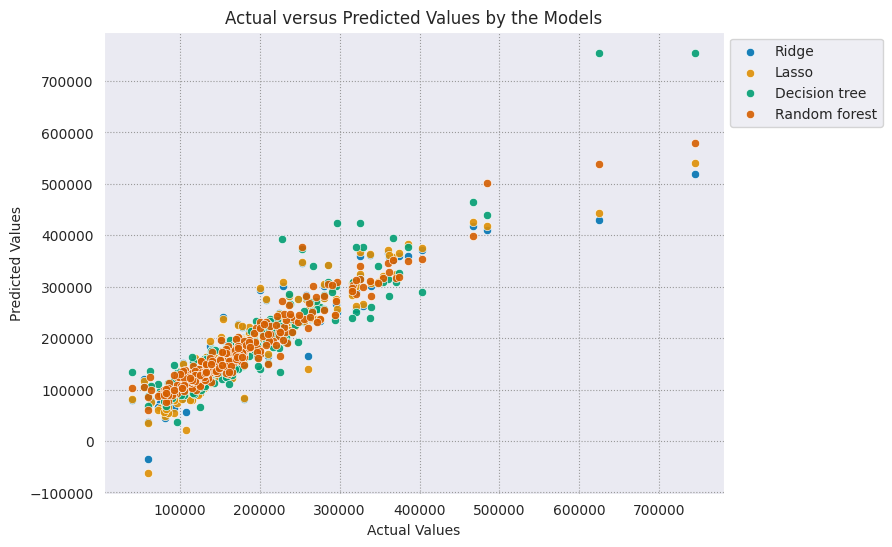

In [82]:
# Put all predictions in one plot, with the realized value on the horizontal axis and the predictions in the vertical axis. What do you learn?
fig, axs = plt.subplots(figsize=(8,6))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(x = label_test, y = ridge_prices, label = r'Ridge', alpha = 0.9)
sns.scatterplot(x = label_test, y = lasso_prices, label = r'Lasso', alpha = 0.9)
sns.scatterplot(x = label_test, y = dtree_prices, label = r'Decision tree', alpha = 0.9)
sns.scatterplot(x = label_test, y = rf_prices, label = r'Random forest', alpha = 0.9)
sns.move_legend(axs, "upper left", bbox_to_anchor=(1, 1))
plt.title ("Actual versus Predicted Values by the Models")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [83]:
!pip install scikit-plot

In [87]:
X= df_copy
X

LotArea  OverallQual  OverallCond  YearBuilt  TotalBsmtSF  2ndFlrSF  \
0        8450            7            5       2003          856       854   
1        9600            6            8       1976         1262         0   
2       11250            7            5       2001          920       866   
3        9550            7            5       1915          756       756   
4       14260            8            5       2000         1145      1053   
...       ...          ...          ...        ...          ...       ...   
1455     7917            6            5       1999          953       694   
1456    13175            6            6       1978         1542         0   
1457     9042            7            9       1941         1152      1152   
1458     9717            5            6       1950         1078         0   
1459     9937            5            6       1965         1256         0   

      GrLivArea  LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  \
0          1710              1              0              0   
1          1262              1              0              0   
2          1786              1              0              0   
3          1717              1              0              0   
4          2198              1              0              0   
...         ...            ...            ...            ...   
1455       1647              1              0              0   
1456       2073              1              0              0   
1457       2340              1              0              0   
1458       1078              1              0              0   
1459       1256              1              0              0   

      Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        0                     0                    0   
3                        0                     0                    0   
4                        0                     0                    0   
...                    ...                   ...                  ...   
1455                     0                     0                    0   
1456                     0                     0                    0   
1457                     0                     0                    0   
1458                     0                     0                    0   
1459                     0                     0                    0   

      Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                        0                     0                     1   
1                        0                     0                     0   
2                        0                     0                     1   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
1455                     0                     0                     0   
1456                     0                     0                     0   
1457                     0                     0                     0   
1458                     0                     0                     0   
1459                     0                     0                     0   

      Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        1                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
1455                     0  

In [86]:
Y=df['SalePrice']
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [88]:
## Split the datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

In [89]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1022, 60) (438, 60) (1022,) (438,)


In [90]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, Y_train, Y_test):
    # Names of models
    model_name_list = [ 'Ridge Regression', 'Lasso Regression',
                      'Random Forest', 'DecisionTree Regression']


    # Instantiate the models
    #lr = LinearRegression()
    ridge_reg = Ridge()
    lasso_reg = Lasso()
    rf_reg = RandomForestRegressor(n_estimators=100,  random_state = 1,bootstrap = True)
    #rf_reg = RandomForestRegressor(max_depth = 6, max_features = 'sqrt', n_estimators = 350)
    dt_reg = DecisionTreeRegressor(random_state = 1)
    #dt_reg = DecisionTreeRegressor(max_depth = 5, max_features = 'sqrt')


    # Dataframe for results
    results = pd.DataFrame(columns=['mae_train', 'mae_test',
                                    'mse_train', 'mse_test',
                                   'r2_train', 'r2_test'], index = model_name_list)

    models = [ridge_reg, lasso_reg, rf_reg, dt_reg]

    # Train and predict with each model
    for i, model in enumerate(models):
        model.fit(X_train, Y_train)
        predictions_train = model.predict(X_train)
        predictions_test = model.predict(X_test)

        # Metrics
        metric_mae_train = np.mean(abs(predictions_train - Y_train))
        metric_mse_train = np.mean((predictions_train - Y_train) ** 2)
        metric_r2_train  = abs(r2_score(Y_train, predictions_train))

        metric_mae_test = np.mean(abs(predictions_test - Y_test))
        metric_mse_test = np.mean((predictions_test - Y_test) ** 2)
        metric_r2_test  = abs(r2_score(Y_test, predictions_test))




        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [metric_mae_train, metric_mae_test,
                                      metric_mse_train, metric_mse_test,
                                     metric_r2_train, metric_r2_test]


    return results

In [91]:
# Evaluate the Regression results
reg_results = evaluate(X_train,  X_test, Y_train, Y_test)
reg_results

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.143e+10, tolerance: 6.080e+08
  model = cd_fast.enet_coordinate_descent(


mae_train      mae_test         mse_train  \
Ridge Regression         18694.772922  19730.454986  867131844.541097   
Lasso Regression         18295.631063  19889.221257  789985265.426569   
Random Forest              7233.14443  18277.358234  156460495.556715   
DecisionTree Regression     54.533594  23760.191781     237061.317678   

                                  mse_test  r2_train   r2_test  
Ridge Regression          950814832.638252  0.854231  0.866838  
Lasso Regression          961412889.350897    0.8672  0.865354  
Random Forest             685626839.355606  0.973698  0.903978  
DecisionTree Regression  1217539895.091324   0.99996  0.829483

In [92]:
reg = reg_results[["mse_test", "mse_train"]]
reg

mse_test         mse_train
Ridge Regression          950814832.638252  867131844.541097
Lasso Regression          961412889.350897  789985265.426569
Random Forest             685626839.355606  156460495.556715
DecisionTree Regression  1217539895.091324     237061.317678

In [93]:
reg2 = reg_results[["mae_test", "mae_train"]]
reg2

mae_test     mae_train
Ridge Regression         19730.454986  18694.772922
Lasso Regression         19889.221257  18295.631063
Random Forest            18277.358234    7233.14443
DecisionTree Regression  23760.191781     54.533594

In [94]:
plt.figure(figsize= (6,6),  dpi = 150)
#sns.diverging_palette(220, 20, as_cmap = True, center = "dark")
sns.lineplot(data = reg.T)#, palette = "coolwarm")
plt.title("Mean Squared Error for Regressions")
plt.legend(bbox_to_anchor=(1.1, 1), loc='center', borderaxespad=0, title="Regression Models")
plt.ylabel("Mean Squared Error Value")

Text(0, 0.5, 'Mean Squared Error Value')

In [95]:
plt.figure(figsize= (6,6),  dpi = 150)
#sns.diverging_palette(220, 20, as_cmap = True, center = "dark")
sns.lineplot(data = reg2.T)#, palette = "coolwarm")
plt.title("Mean Absolute Error for Regressions")
plt.legend(bbox_to_anchor=(1.1, 1), loc='center', borderaxespad=0, title="Regression Models")
plt.ylabel("Mean Absolute Error Value")

Text(0, 0.5, 'Mean Absolute Error Value')

In [96]:
reg2 = reg_results["r2_train"]
reg2

Ridge Regression           0.854231
Lasso Regression             0.8672
Random Forest              0.973698
DecisionTree Regression     0.99996
Name: r2_train, dtype: object

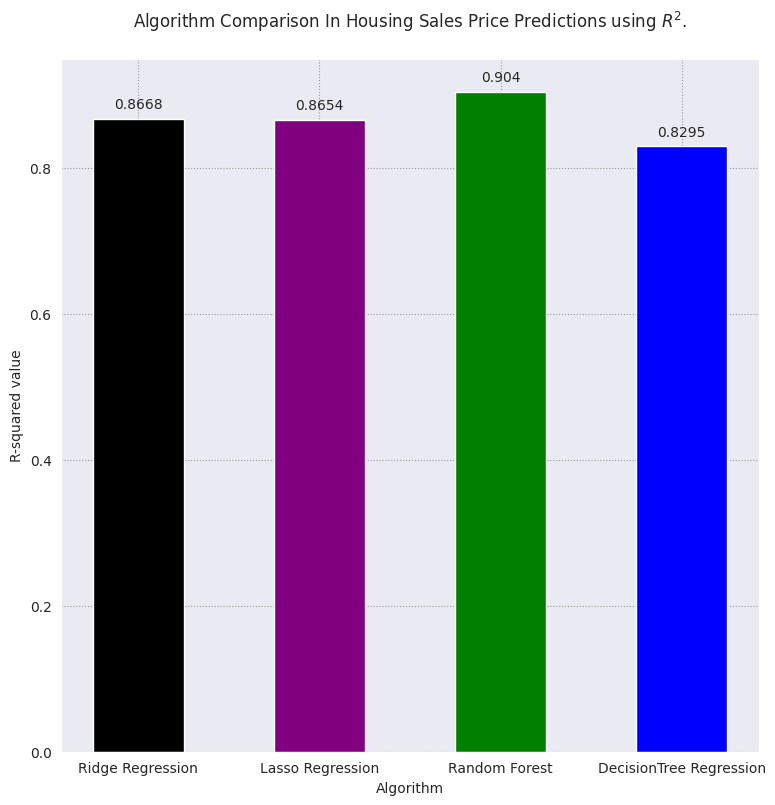

In [97]:
algorithm = list(reg_results.index)
score = list(np.round(list(reg_results.r2_test),4))

x = np.arange(len(algorithm))
width = 0.5

fig, ax = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(9)
ax.set_title("Algorithm Comparison In Housing Sales Price Predictions using $R^2$.\n")
ax.set_xlabel("Algorithm")
ax.set_ylabel("R-squared value")
ax.set_xticks(x)
ax.set_xticklabels(algorithm)

algo_frame = ax.bar(x, score, width, label='Algorithm',  color=['black', 'purple', 'green', 'blue', 'navy'])
for algo in algo_frame:
    height = algo.get_height()
    ax.annotate("{}".format(height),
                xy = (algo.get_x() + algo.get_width() / 2, height),
                xytext = (0,5),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

In [98]:
df_ML

LotArea  OverallQual  OverallCond  YearBuilt  BsmtFinSF1  TotalBsmtSF  \
0        8450            7            5       2003         706          856   
1        9600            6            8       1976         978         1262   
2       11250            7            5       2001         486          920   
3        9550            7            5       1915         216          756   
4       14260            8            5       2000         655         1145   
...       ...          ...          ...        ...         ...          ...   
1455     7917            6            5       1999           0          953   
1456    13175            6            6       1978         790         1542   
1457     9042            7            9       1941         275         1152   
1458     9717            5            6       1950          49         1078   
1459     9937            5            6       1965         830         1256   

      2ndFlrSF  GrLivArea  SalePrice  LandSlope_Gtl  LandSlope_Mod  \
0          854       1710     208500              1              0   
1            0       1262     181500              1              0   
2          866       1786     223500              1              0   
3          756       1717     140000              1              0   
4         1053       2198     250000              1              0   
...        ...        ...        ...            ...            ...   
1455       694       1647     175000              1              0   
1456         0       2073     210000              1              0   
1457      1152       2340     266500              1              0   
1458         0       1078     142125              1              0   
1459         0       1256     147500              1              0   

      LandSlope_Sev  Neighborhood_Blmngtn  Neighborhood_Blueste  \
0                 0                     0                     0   
1                 0                     0                     0   
2                 0                     0                     0   
3                 0                     0                     0   
4                 0                     0                     0   
...             ...                   ...                   ...   
1455              0                     0                     0   
1456              0                     0                     0   
1457              0                     0                     0   
1458              0                     0                     0   
1459              0                     0                     0   

      Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   
...                   ...                   ...                   ...   
1455                    0                     0                     0   
1456                    0                     0                     0   
1457                    0                     0                     0   
1458                    0                     0                     0   
1459                    0                     0                     0   

      Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                        1                     0                     0   
1                        0                     0                     0   
2                        1                     0                     0   
3                        0                     1                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
1455            

In [ ]:
df_ML2 = df_ML.iloc[:,:8]
df_ML2

LotArea  OverallQual  OverallCond  YearBuilt  BsmtFinSF1  TotalBsmtSF  \
0        8450            7            5       2003         706          856   
1        9600            6            8       1976         978         1262   
2       11250            7            5       2001         486          920   
3        9550            7            5       1915         216          756   
4       14260            8            5       2000         655         1145   
...       ...          ...          ...        ...         ...          ...   
1455     7917            6            5       1999           0          953   
1456    13175            6            6       1978         790         1542   
1457     9042            7            9       1941         275         1152   
1458     9717            5            6       1950          49         1078   
1459     9937            5            6       1965         830         1256   

      2ndFlrSF  GrLivArea  
0          854       1710  
1            0       1262  
2          866       1786  
3          756       1717  
4         1053       2198  
...        ...        ...  
1455       694       1647  
1456         0       2073  
1457      1152       2340  
1458         0       1078  
1459         0       1256  

[1460 rows x 8 columns]

In [103]:
X = df_ML2
X

NameError: ignored

In [100]:
Y= df_ML.iloc[:,8]
Y = pd.DataFrame (Y, columns = ['SalePrice'])
Y

SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1455     175000
1456     210000
1457     266500
1458     142125
1459     147500

[1460 rows x 1 columns]

In [101]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [104]:
df_ML2.info()

NameError: ignored

In [105]:
## Split the datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=1)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1095, 60) (365, 60) (1095, 1) (365, 1)


In [106]:
n_estimators=100
rf_reg = RandomForestRegressor(n_estimators=100, random_state = 1,bootstrap = True, max_depth = 6)
rf_reg.fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error

estimatorMSE=[]
for curEstimator in range(n_estimators):
    estimatorMSE.append([curEstimator,mean_squared_error(Y_test, rf_reg.estimators_[curEstimator].predict(X_test))])

estimatorMSE=pd.DataFrame(estimatorMSE,columns=['estimatorNumber','mean_squared_error'])
estimatorMSE.sort_values(inplace=True,by='mean_squared_error',)

bestDecisionTree_reg = rf_reg.estimators_[estimatorMSE.head(1)['estimatorNumber'].values[0]]


<ipython-input-106-43746b1a48fc>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, Y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names,

In [107]:
X_test.shape, Y_test.shape

((365, 60), (365, 1))

In [108]:
bestDecisionTree_reg

DecisionTreeRegressor(max_depth=6, max_features=1.0, random_state=398576445)

In [109]:
dt= bestDecisionTree_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [110]:
#plt.figure(figsize = (7,7))
sns.regplot(x= Y_test, y= dt)
plt.xlabel("Desired values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Desired Values for the best regression model.")



Text(0.5, 1.0, 'Predicted vs Desired Values for the best regression model.')

***Finding the best specification of each algorithm***

First we will do it for Lasso and Ridge and model and then we will switch to the random forest and decision tree model.

In [111]:
# Define grid for Ridge and Lasso
grid_rl = dict()
grid_rl['alpha'] = np.arange(0.01, 1, 0.05)

In [112]:
ridge_reg_cv = Ridge()
lasso_reg_cv =Lasso()

In [113]:
# Define the searches
searchR = GridSearchCV(ridge_reg_cv, grid_rl, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
searchL = GridSearchCV(lasso_reg_cv, grid_rl, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

In [114]:
# Perform the searches
resultsR = searchR.fit(features_train,label_train)
resultsL = searchL.fit(features_train,label_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.125e+10, tolerance: 7.116e+08
  model = cd_fast.enet_coordinate_descent(


In [115]:
# Print the MSE, its standard error, and the best parameter configuration for each model.
print('MSE: %.3f' % np.abs(resultsR.best_score_))
print('Config: %s' % resultsR.best_params_)

MSE: 1304064933.069
Config: {'alpha': 0.9600000000000001}


In [116]:
# Print the MSE, its standard error, and the best parameter configuration for each model.
print('MSE: %.3f' % np.abs(resultsL.best_score_))
print('Config: %s' % resultsL.best_params_)

MSE: 1380364042.328
Config: {'alpha': 0.9600000000000001}


We'll now turn to the Decision Tree and Random Forests. To keep things simple, we'll focus on two hyperparameters of decision trees: the `max_depth` and `max_features`. We'll add a third parameter for the Random Forests. Use the following grid to find the best specification.

In [117]:
# Hyperparamters to form the grid
max_features = ['sqrt']
max_depth = [int(x) for x in np.linspace(start = 4, stop = 6, num = 3)]

In [118]:
dt_grid = {'max_features': max_features,'max_depth':max_depth}

In [119]:
# For the random forest model, we'll add a hyperparameter to the search
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 400, num = 5)]

In [120]:
rf_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [121]:
# Define the `GridSearchCV` problem and perform the search.
grid_search_dt = GridSearchCV(dtree_reg, dt_grid, cv =10, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid_search_dt

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6], 'max_features': ['sqrt']},
             scoring='neg_mean_squared_error')

In [122]:
# Define the `GridSearchCV` problem and perform the search.
grid_search_rf= GridSearchCV(rf_reg, rf_grid, cv =10, scoring = 'neg_mean_squared_error', n_jobs = -1)
grid_search_rf

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=6, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6], 'max_features': ['sqrt'],
                         'n_estimators': [300, 325, 350, 375, 400]},
             scoring='neg_mean_squared_error')

In [123]:
resultsdt = grid_search_dt.fit(features_train,label_train)
resultsrf = grid_search_rf.fit(features_train,label_train)

In [124]:
#Note:Each time you re-run the file the function gives different best hypertuned parameters.
# Print the MSE, its standard error, and the best hyperparameter configuration
print('MSE: %.3f' % np.std(resultsdt.best_score_))
print('Config: %s' % resultsdt.best_params_)

MSE: 0.000
Config: {'max_depth': 6, 'max_features': 'sqrt'}


In [125]:
#Note:Each time you re-run the file the function gives different best hypertuned parameters.
# Print the MSE, its standard error, and the best hyperparameter configuration
print('MSE: %.3f' % np.std(resultsrf.best_score_))
print('Config: %s' % resultsrf.best_params_)

MSE: 0.000
Config: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 400}


In [126]:
# Predict the label of the test dataset for each model. Remember that you need to re-define the problems with the best hyperparameter configuration and re-train as well, before prediction
reg_dt2 = DecisionTreeRegressor(max_depth = 5, max_features = 'sqrt')
reg_dt2 = reg_dt2.fit(features_train,label_train)

In [127]:
# Predict the label of the test dataset for each model. Remember that you need to re-define the problems with the best hyperparameter configuration and re-train as well, before prediction
red_rf2 = RandomForestRegressor(max_depth = 6, max_features = 'sqrt', n_estimators = 350)
reg_rf2 = red_rf2.fit(features_train,label_train)

In [128]:
dtree_prices2 = reg_dt2.predict(features_test)
rf_prices2 = reg_rf2.predict(features_test)

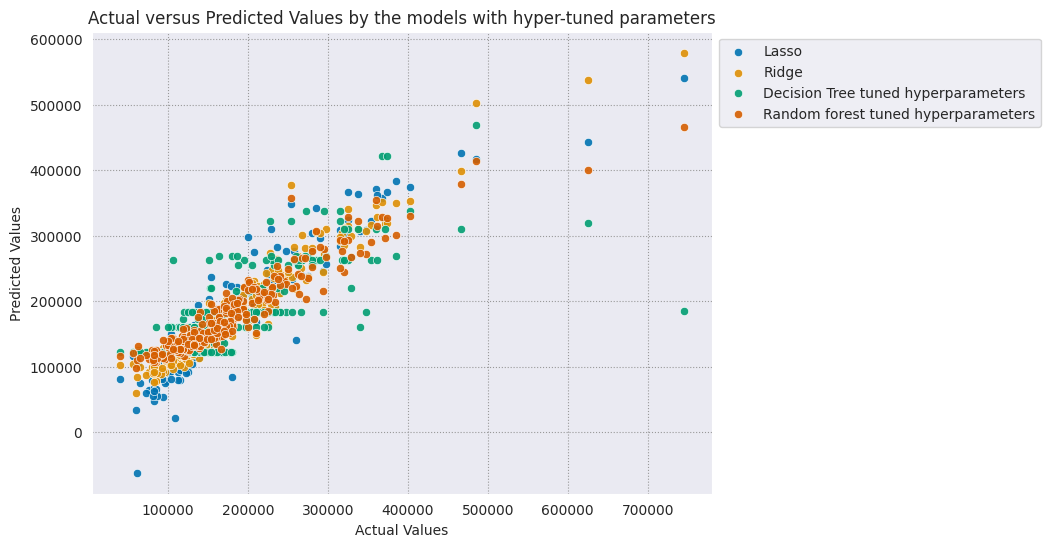

In [129]:
# Plot the predictions and realized values of the best versions of Ridge, DT, and RF. Do you see anything interesting? (for example, play close attention to the DT. What is happening?)
fig, axs = plt.subplots(figsize=(8,6))
sns.scatterplot(x = label_test, y = lasso_prices, label = r'Lasso', alpha = 0.9)
sns.scatterplot(y = rf_prices,  x = label_test, label = r'Ridge', alpha = 0.9)
sns.scatterplot(y = dtree_prices2, x = label_test, label = r'Decision Tree tuned hyperparameters', alpha = 0.9)
sns.scatterplot(y = rf_prices2 , x = label_test, label = r'Random forest tuned hyperparameters', alpha = 0.9)
sns.move_legend(axs, "upper left", bbox_to_anchor=(1, 1))
plt.title ("Actual versus Predicted Values by the models with hyper-tuned parameters")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [130]:
Y = dep_var['Log_SalePrice']
Y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: Log_SalePrice, Length: 1460, dtype: float64

In [131]:
X= df_copy
X

LotArea  OverallQual  OverallCond  YearBuilt  TotalBsmtSF  2ndFlrSF  \
0        8450            7            5       2003          856       854   
1        9600            6            8       1976         1262         0   
2       11250            7            5       2001          920       866   
3        9550            7            5       1915          756       756   
4       14260            8            5       2000         1145      1053   
...       ...          ...          ...        ...          ...       ...   
1455     7917            6            5       1999          953       694   
1456    13175            6            6       1978         1542         0   
1457     9042            7            9       1941         1152      1152   
1458     9717            5            6       1950         1078         0   
1459     9937            5            6       1965         1256         0   

      GrLivArea  LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  \
0          1710              1              0              0   
1          1262              1              0              0   
2          1786              1              0              0   
3          1717              1              0              0   
4          2198              1              0              0   
...         ...            ...            ...            ...   
1455       1647              1              0              0   
1456       2073              1              0              0   
1457       2340              1              0              0   
1458       1078              1              0              0   
1459       1256              1              0              0   

      Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        0                     0                    0   
3                        0                     0                    0   
4                        0                     0                    0   
...                    ...                   ...                  ...   
1455                     0                     0                    0   
1456                     0                     0                    0   
1457                     0                     0                    0   
1458                     0                     0                    0   
1459                     0                     0                    0   

      Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                        0                     0                     1   
1                        0                     0                     0   
2                        0                     0                     1   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
1455                     0                     0                     0   
1456                     0                     0                     0   
1457                     0                     0                     0   
1458                     0                     0                     0   
1459                     0                     0                     0   

      Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        1                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
1455                     0  

In [132]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=1)

In [133]:
ridge_reg = Ridge()
ridge_reg.fit(X_train, Y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, Y_train)
dt_reg= DecisionTreeRegressor(random_state = 1)
dt_reg.fit(X_train, Y_train)


DecisionTreeRegressor(random_state=1)

In [134]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, Y_train, Y_test):
    # Names of models
    model_name_list = [ 'Ridge Regression', 'Lasso Regression',
                       'DecisionTree Regression']


    # Instantiate the models
    #lr = LinearRegression()
    ridge_reg = Ridge()
    lasso_reg = Lasso()
    #rf_reg = RandomForestRegressor(n_estimators=100,  random_state = 1,bootstrap = True)
    #rf_reg = RandomForestRegressor(max_depth = 6, max_features = 'sqrt', n_estimators = 350)
    dt_reg = DecisionTreeRegressor(random_state = 1)
    #dt_reg = DecisionTreeRegressor(max_depth = 5, max_features = 'sqrt')


    # Dataframe for results
    results = pd.DataFrame(columns=['mae_train', 'mae_test',
                                    'mse_train', 'mse_test',
                                   'r2_train', 'r2_test'], index = model_name_list)

    models = [ridge_reg, lasso_reg, dt_reg]

    # Train and predict with each model
    for i, model in enumerate(models):
        model.fit(X_train, Y_train)
        predictions_train = model.predict(X_train)
        predictions_test = model.predict(X_test)

        # Metrics
        metric_mae_train = np.mean(abs(predictions_train - Y_train))
        metric_mse_train = np.mean((predictions_train - Y_train) ** 2)
        metric_r2_train  = abs(r2_score(Y_train, predictions_train))

        metric_mae_test = np.mean(abs(predictions_test - Y_test))
        metric_mse_test = np.mean((predictions_test - Y_test) ** 2)
        metric_r2_test  = abs(r2_score(Y_test, predictions_test))




        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [metric_mae_train, metric_mae_test,
                                      metric_mse_train, metric_mse_test,
                                     metric_r2_train, metric_r2_test]


    return results

In [135]:
reg_results_Log = evaluate(X_train,  X_test, Y_train, Y_test)
reg_results_Log

mae_train  mae_test mse_train  mse_test  r2_train  \
Ridge Regression         0.093624  0.096521  0.018041  0.017923  0.884617   
Lasso Regression          0.13632  0.140359  0.045445     0.038  0.709359   
DecisionTree Regression  0.000346  0.138284   0.00001  0.039317  0.999934   

                          r2_test  
Ridge Regression          0.89306  
Lasso Regression         0.773269  
DecisionTree Regression  0.765413

In [136]:
reg_results = reg_results_Log[["mse_test", "mse_train"]]
reg_results

mse_test mse_train
Ridge Regression         0.017923  0.018041
Lasso Regression            0.038  0.045445
DecisionTree Regression  0.039317   0.00001

Text(0, 0.5, 'Mean Squared Error Value')

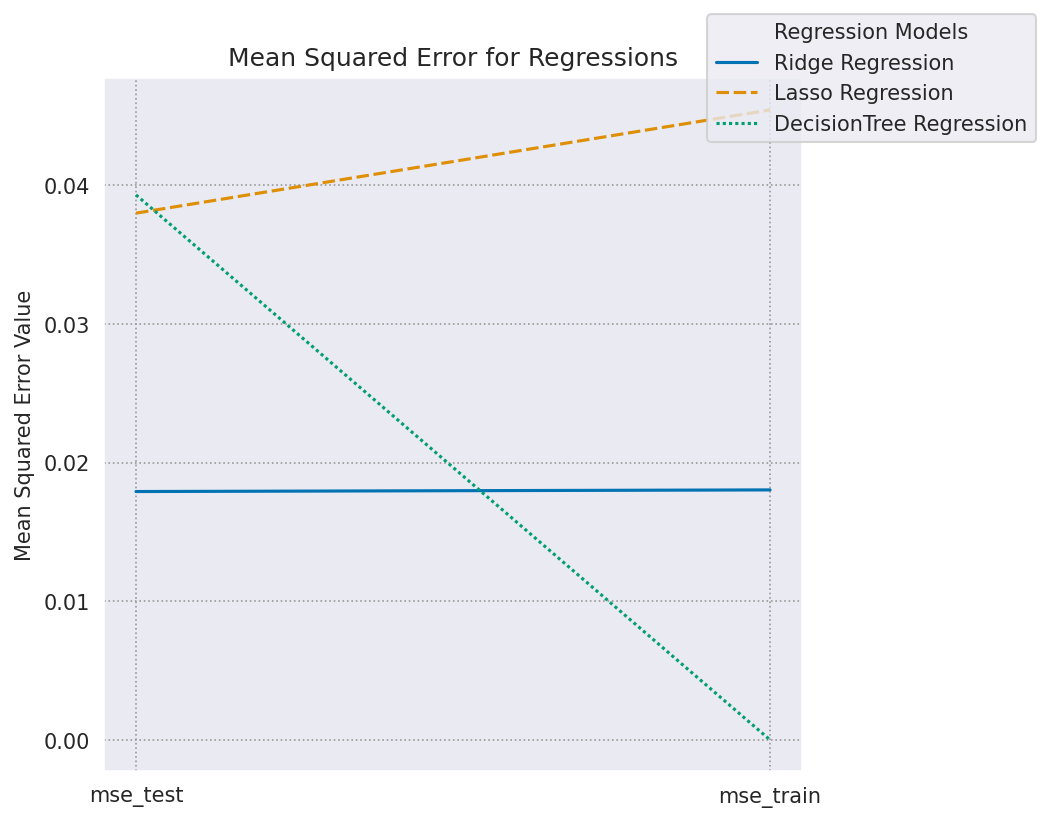

In [137]:
plt.figure(figsize= (6,6),  dpi = 150)
#sns.diverging_palette(220, 20, as_cmap = True, center = "dark")
sns.lineplot(data = reg_results.T)#, palette = "coolwarm")
plt.title("Mean Squared Error for Regressions")
plt.legend(bbox_to_anchor=(1.1, 1), loc='center', borderaxespad=0, title="Regression Models")
plt.ylabel("Mean Squared Error Value")

In [138]:
Y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: Log_SalePrice, Length: 1460, dtype: float64

In [139]:
X

LotArea  OverallQual  OverallCond  YearBuilt  TotalBsmtSF  2ndFlrSF  \
0        8450            7            5       2003          856       854   
1        9600            6            8       1976         1262         0   
2       11250            7            5       2001          920       866   
3        9550            7            5       1915          756       756   
4       14260            8            5       2000         1145      1053   
...       ...          ...          ...        ...          ...       ...   
1455     7917            6            5       1999          953       694   
1456    13175            6            6       1978         1542         0   
1457     9042            7            9       1941         1152      1152   
1458     9717            5            6       1950         1078         0   
1459     9937            5            6       1965         1256         0   

      GrLivArea  LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  \
0          1710              1              0              0   
1          1262              1              0              0   
2          1786              1              0              0   
3          1717              1              0              0   
4          2198              1              0              0   
...         ...            ...            ...            ...   
1455       1647              1              0              0   
1456       2073              1              0              0   
1457       2340              1              0              0   
1458       1078              1              0              0   
1459       1256              1              0              0   

      Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        0                     0                    0   
3                        0                     0                    0   
4                        0                     0                    0   
...                    ...                   ...                  ...   
1455                     0                     0                    0   
1456                     0                     0                    0   
1457                     0                     0                    0   
1458                     0                     0                    0   
1459                     0                     0                    0   

      Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                        0                     0                     1   
1                        0                     0                     0   
2                        0                     0                     1   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
1455                     0                     0                     0   
1456                     0                     0                     0   
1457                     0                     0                     0   
1458                     0                     0                     0   
1459                     0                     0                     0   

      Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        1                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
1455                     0  

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=1)

In [142]:
rf= RandomForestRegressor(n_estimators=400, max_features='sqrt', max_depth=6)
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=6, max_features='sqrt', n_estimators=400)

In [143]:
y_pred_log = rf.predict(X_test)

In [144]:
y_pred = np.exp(y_pred_log)

In [145]:
mse = mean_squared_error(Y_test, y_pred_log)
mse

0.030390273826376445

In [146]:
RMSE = np.sqrt(mse)
RMSE

0.17432806379460664

In [147]:
r2 = r2_score(Y_test, y_pred_log )
r2

0.8186734645173149

In [148]:
reg3 = reg_results_Log['r2_train']

In [149]:
algorithm = list(reg_results_Log.index)
score = list(np.round(list(reg_results_Log.r2_test),4))

x = np.arange(len(algorithm))
width = 0.5

fig, ax = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(9)
ax.set_title("Algorithm Comparison In Housing Sales Price Predictions using $R^2$.\n")
ax.set_xlabel("Algorithm")
ax.set_ylabel("R-squared value")
ax.set_xticks(x)
ax.set_xticklabels(algorithm)

algo_frame = ax.bar(x, score, width, label='Algorithm',  color=['black', 'purple', 'green', 'blue', 'navy'])
for algo in algo_frame:
    height = algo.get_height()
    ax.annotate("{}".format(height),
                xy = (algo.get_x() + algo.get_width() / 2, height),
                xytext = (0,5),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

**4.3 Deep Learning approach - a three layer neural network**

I will build a simple neural network that takes all variables as input, regardless of whether it is a significant predictor or not. The simple neural network will use Keras package and have 4 dense layers, with 32, 64, 32, 1 neurons on each layer.


The advantage of using the neural network is to use all variables, including the categorical variables. The disadvantage is the low interpretebility.

In [150]:
# load data
train_raw = pd.read_csv('/content/STAT654/train.csv')
train_raw["Log_SalePrice"] = np.log(train_raw["SalePrice"])

In [151]:
# Generate the variables
# Generate Y
Y_sale = train_raw["SalePrice"]
Y_log_sale = train_raw["Log_SalePrice"]
# Generate X
X = train_raw.copy()
# Select only numeric columns (float and integer columns)
num_cols = X.select_dtypes(include=['float', 'int'])

# Perform Z-score normalization on numeric columns
num_cols_normalized = (num_cols - num_cols.mean()) / num_cols.std()

# Replace the original numeric columns with normalized values
X[num_cols_normalized.columns] = num_cols_normalized

# Convert Categorical Variables to boolean
list_obj = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2',
            'BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
            'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
            'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

X_one_hot = pd.get_dummies(X, columns=list_obj)
# Drop ID, saleprices and log saleprices
X_one_hot = X_one_hot.drop(columns=['Id', 'SalePrice', 'Log_SalePrice'])
X_one_hot = np.nan_to_num(X_one_hot, nan=0)
X_one_hot

array([[-0.2079477 , -0.20707076,  0.6512561 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.40972384, -0.0918549 , -0.07181151, ...,  0.        ,
         1.        ,  0.        ],
       [-0.0844134 ,  0.07345481,  0.6512561 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.1667696 , -0.14775964,  0.6512561 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.0844134 , -0.08013294, -0.79487911, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.20383332, -0.05809164, -0.79487911, ...,  0.        ,
         1.        ,  0.        ]])

In [152]:
X_one_hot.shape

(1460, 302)

In [153]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

X_train, X_test, y_train, y_test = train_test_split(X_one_hot, Y_log_sale, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

model = Sequential()
model.add(Dense(256, input_dim=X_one_hot.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Define the path to save the best model
filepath = "best_model.h5"

# Set up the ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Train the model with the ModelCheckpoint callback
history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_val, y_val), callbacks=[checkpoint], epochs=2000)

Epoch 1/2000
25/37 [===================>..........] - ETA: 0s - loss: 30.6407  
Epoch 1: val_loss improved from inf to 0.83535, saving model to best_model.h5
37/37 [==============================] - 1s 7ms/step - loss: 22.0194 - val_loss: 0.8354
Epoch 2/2000
36/37 [============================>.] - ETA: 0s - loss: 1.4001
Epoch 2: val_loss improved from 0.83535 to 0.27249, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Streaming output truncated to the last 5000 lines.
Epoch 751/2000
36/37 [============================>.] - ETA: 0s - loss: 0.1739
Epoch 751: val_loss did not improve from 0.01977
37/37 [==============================] - 0s 4ms/step - loss: 0.1739 - val_loss: 0.0262
Epoch 752/2000
34/37 [==========================>...] - ETA: 0s - loss: 0.1674
Epoch 752: val_loss did not improve from 0.01977
37/37 [==============================] - 0s 4ms/step - loss: 0.1679 - val_loss: 0.0258
Epoch 753/2000
35/37 [===========================>..] - ETA: 0s - loss: 0.1734
Epoch 753: val_loss did not improve from 0.01977
37/37 [==============================] - 0s 4ms/step - loss: 0.1746 - val_loss: 0.0328
Epoch 754/2000
33/37 [=========================>....] - ETA: 0s - loss: 0.1901
Epoch 754: val_loss did not improve from 0.01977
37/37 [==============================] - 0s 4ms/step - loss: 0.1860 - val_loss: 0.0247
Epoch 755/2000
20/37 [===============>..............] - ETA: 0s - loss: 0.1659
Epoch 755:

In [154]:
#from sklearn.metrics import r2_score, mean_squared_error

# assuming you have trained a neural network and have obtained the predicted values and ground truth values
y_pred = model.predict(X_val)
y_true = y_val

# calculate the R2 score
r2 = r2_score(y_true, y_pred)

# calculate the mean squared error
mse = mean_squared_error(y_true, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)

5/5 [==============================] - 1s 2ms/step
R2 Score: 0.8902256720295194
Mean Squared Error: 0.02088381709633113


In [ ]:
# Load the saved model
from keras.models import load_model
model2 = load_model('/content/best_model.h5')

# Use the loaded model for prediction
y_pred = model2.predict(X_val)
y_true = y_val

# calculate the R2 score
r2 = r2_score(y_true, y_pred)

# calculate the mean squared error
mse = mean_squared_error(y_true, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)

5/5 [==============================] - 0s 7ms/step
R2 Score: 0.8982504508751693
Mean Squared Error: 957358370.1768599


In [155]:

X_train, X_test, y_train, y_test = train_test_split(X_one_hot, Y_sale, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

model = Sequential()
model.add(Dense(128, input_dim=X_one_hot.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Define the path to save the best model
filepath = "best_model.h5"

# Set up the ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Train the model with the ModelCheckpoint callback
history = model.fit(X_train, y_train, batch_size=32, validation_data=(X_val, y_val), callbacks=[checkpoint], epochs=3500)

Epoch 1/3500
31/37 [========================>.....] - ETA: 0s - loss: 39187296256.0000 
Epoch 1: val_loss improved from inf to 43567968256.00000, saving model to best_model.h5
37/37 [==============================] - 1s 6ms/step - loss: 38879854592.0000 - val_loss: 43567968256.0000
Epoch 2/3500
32/37 [========================>.....] - ETA: 0s - loss: 38853996544.0000
Epoch 2: val_loss improved from 43567968256.00000 to 43389145088.00000, saving model to best_model.h5
37/37 [==============================] - 0s 3ms/step - loss: 38804025344.0000 - val_loss: 43389145088.0000
Epoch 3/3500
 1/37 [..............................] - ETA: 0s - loss: 49145995264.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Streaming output truncated to the last 5000 lines.
Epoch 2251/3500
32/37 [========================>.....] - ETA: 0s - loss: 405789696.0000
Epoch 2251: val_loss did not improve from 1108198784.00000
37/37 [==============================] - 0s 3ms/step - loss: 413096064.0000 - val_loss: 1184681088.0000
Epoch 2252/3500
30/37 [=======================>......] - ETA: 0s - loss: 444174816.0000
Epoch 2252: val_loss did not improve from 1108198784.00000
37/37 [==============================] - 0s 3ms/step - loss: 431190816.0000 - val_loss: 1150027776.0000
Epoch 2253/3500
32/37 [========================>.....] - ETA: 0s - loss: 445785152.0000
Epoch 2253: val_loss did not improve from 1108198784.00000
37/37 [==============================] - 0s 2ms/step - loss: 435137984.0000 - val_loss: 1159289088.0000
Epoch 2254/3500
34/37 [==========================>...] - ETA: 0s - loss: 432696288.0000
Epoch 2254: val_loss did not improve from 1108198784.00000
37/37 [==============================] - 0s 3ms/s

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# assuming you have trained a neural network and have obtained the predicted values and ground truth values
y_pred = model.predict(X_val)
y_true = y_val

# calculate the R2 score
r2 = r2_score(y_true, y_pred)

# calculate the mean squared error
mse = mean_squared_error(y_true, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)

5/5 [==============================] - 0s 5ms/step
R2 Score: 0.8947012887991608
Mean Squared Error: 990752326.7084267


In [ ]:
# Load the saved model
from keras.models import load_model
model2 = load_model('/content/best_model.h5')

# Use the loaded model for prediction
y_pred = model.predict(X_val)
y_true = y_val

# calculate the R2 score
r2 = r2_score(y_true, y_pred)

# calculate the mean squared error
mse = mean_squared_error(y_true, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)

5/5 [==============================] - 0s 4ms/step
R2 Score: 0.8947012887991608
Mean Squared Error: 990752326.7084267


Conclusions: the mean square error could reach aroun 20 when we use the neural network approach

# Step 5: Models comparasion
**5.1 Comparasions based on performance**

Compare Mean Squared Error (MSE), Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) for the 4 models listed above

We split the train and test dataset by 0.8 - 0.2

**5.2 Discussing the pros and cons of each model**

Talk about overfitting considerations. How to split the data? 0.6 train, 0.2 test and 0.2 validation? Did we observe any overfitting?

# Step 6: Run Model on test data and final submission

**6.1 Based on the discussion on step 5, we choose one or two models as our final model.**


**6.2 Submit the final output to Kaggle**

Discuss our competition performance.

In [158]:
df.select_dtypes(include=['object'])

Id MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
0        1         60       RL   Pave   NaN      Reg         Lvl    AllPub   
1        2         20       RL   Pave   NaN      Reg         Lvl    AllPub   
2        3         60       RL   Pave   NaN      IR1         Lvl    AllPub   
3        4         70       RL   Pave   NaN      IR1         Lvl    AllPub   
4        5         60       RL   Pave   NaN      IR1         Lvl    AllPub   
...    ...        ...      ...    ...   ...      ...         ...       ...   
1455  1456         60       RL   Pave   NaN      Reg         Lvl    AllPub   
1456  1457         20       RL   Pave   NaN      Reg         Lvl    AllPub   
1457  1458         70       RL   Pave   NaN      Reg         Lvl    AllPub   
1458  1459         20       RL   Pave   NaN      Reg         Lvl    AllPub   
1459  1460         20       RL   Pave   NaN      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1          FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3       Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4          FR2       Gtl      NoRidge       Norm       Norm     1Fam   
...        ...       ...          ...        ...        ...      ...   
1455    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
1456    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
1457    Inside       Gtl      Crawfor       Norm       Norm     1Fam   
1458    Inside       Gtl        NAmes       Norm       Norm     1Fam   
1459    Inside       Gtl      Edwards       Norm       Norm     1Fam   

     HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0        2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1        1Story     Gable  CompShg     MetalSd     MetalSd       None   
2        2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3        2Story     Gable  CompShg     Wd Sdng     Wd Shng       None   
4        2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...         ...       ...      ...         ...         ...        ...   
1455     2Story     Gable  CompShg     VinylSd     VinylSd       None   
1456     1Story     Gable  CompShg     Plywood     Plywood      Stone   
1457     2Story     Gable  CompShg     CemntBd     CmentBd       None   
1458     1Story       Hip  CompShg     MetalSd     MetalSd       None   
1459     1Story     Gable  CompShg     HdBoard     HdBoard       None   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0           Gd        TA      PConc       Gd       TA           No   
1           TA        TA     CBlock       Gd       TA           Gd   
2           Gd        TA      PConc       Gd       TA           Mn   
3           TA        TA     BrkTil       TA       Gd           No   
4           Gd        TA      PConc       Gd       TA           Av   
...        ...       ...        ...      ...      ...          ...   
1455        TA        TA      PConc       Gd       TA           No   
1456        TA        TA     CBlock       Gd       TA           No   
1457        Ex        Gd      Stone       TA       Gd           No   
1458        TA        TA     CBlock       TA       TA           Mn   
1459        Gd        TA     CBlock       TA       TA           No   

     BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0             GLQ          Unf    GasA        Ex          Y      SBrkr   
1             ALQ          Unf    GasA        Ex          Y      SBrkr   
2             GLQ          Unf    GasA        Ex          Y      SBrkr   
3             ALQ          Unf    GasA        Gd          Y      SBrkr   
4             GLQ          Unf    GasA        Ex          Y      SBrkr   
...           ...          ...     ...      

In [157]:
df[['MSZoning', 'Street',	'Alley',	'LotShape',	'LandContour',	'Utilities',	'LotConfig',	'LandSlope',	'Neighborhood']].value_counts()

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood
RM        Pave    Grvl   Reg       Lvl          AllPub     Inside     Gtl        OldTown         20
FV        Pave    Pave   Reg       Lvl          AllPub     Inside     Gtl        Somerst         14
RM        Pave    Grvl   Reg       Lvl          AllPub     Corner     Gtl        OldTown          5
FV        Pave    Pave   IR1       Lvl          AllPub     Inside     Gtl        Somerst          5
RL        Pave    Grvl   Reg       Lvl          AllPub     Inside     Gtl        Edwards          5
FV        Pave    Pave   Reg       Lvl          AllPub     Corner     Gtl        Somerst          4
RL        Pave    Grvl   Reg       Lvl          AllPub     Inside     Gtl        OldTown          4
RM        Pave    Pave   Reg       Lvl          AllPub     Inside     Gtl        OldTown          3
RL        Pave    Pave   Reg       Lvl          AllPub     Inside     Gtl        BrkSide          3
RM    

In [162]:
df.SalePrice.plot.hist()
#To see the Distribution of Sales Price- which is our dependent varaiable

<Axes: ylabel='Frequency'>

In [163]:
# Select only categorical variables
category_df = df.select_dtypes(include=['object'])
# One hot encode the variables
dummy_df = pd.get_dummies(category_df)
# Putting the SalesPrice back in the dataframe
dummy_df['SalePrice'] = df['SalePrice']
# Find correlations with Sale Price
dummy_df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice           1.000000
BsmtQual_Ex         0.553105
KitchenQual_Ex      0.504094
Foundation_PConc    0.497734
ExterQual_Gd        0.452466
                      ...   
MasVnrType_None    -0.374468
GarageFinish_Unf   -0.410608
BsmtQual_TA        -0.452394
KitchenQual_TA     -0.519298
ExterQual_TA       -0.589044
Name: SalePrice, Length: 1728, dtype: float64

In [164]:
dummy_df.corr()

Id_1     Id_10    Id_100   Id_1000   Id_1001  \
Id_1                   1.000000 -0.000685 -0.000685 -0.000685 -0.000685   
Id_10                 -0.000685  1.000000 -0.000685 -0.000685 -0.000685   
Id_100                -0.000685 -0.000685  1.000000 -0.000685 -0.000685   
Id_1000               -0.000685 -0.000685 -0.000685  1.000000 -0.000685   
Id_1001               -0.000685 -0.000685 -0.000685 -0.000685  1.000000   
...                         ...       ...       ...       ...       ...   
SaleCondition_Alloca  -0.002383 -0.002383 -0.002383 -0.002383 -0.002383   
SaleCondition_Family  -0.003085 -0.003085 -0.003085 -0.003085 -0.003085   
SaleCondition_Normal   0.012243  0.012243  0.012243  0.012243  0.012243   
SaleCondition_Partial -0.008011 -0.008011 -0.008011 -0.008011 -0.008011   
SalePrice              0.009092 -0.020743 -0.017133  0.008268 -0.032611   

                        Id_1002   Id_1003   Id_1004   Id_1005   Id_1006  \
Id_1                  -0.000685 -0.000685 -0.000685 -0.000685 -0.000685   
Id_10                 -0.000685 -0.000685 -0.000685 -0.000685 -0.000685   
Id_100                -0.000685 -0.000685 -0.000685 -0.000685 -0.000685   
Id_1000               -0.000685 -0.000685 -0.000685 -0.000685 -0.000685   
Id_1001               -0.000685 -0.000685 -0.000685 -0.000685 -0.000685   
...                         ...       ...       ...       ...       ...   
SaleCondition_Alloca  -0.002383 -0.002383 -0.002383 -0.002383 -0.002383   
SaleCondition_Family  -0.003085 -0.003085 -0.003085 -0.003085 -0.003085   
SaleCondition_Normal  -0.055982  0.012243  0.012243  0.012243  0.012243   
SaleCondition_Partial -0.008011 -0.008011 -0.008011 -0.008011 -0.008011   
SalePrice             -0.031292  0.016839 -0.014510  0.000026 -0.010226   

                        Id_1007   Id_1008   Id_1009    Id_101   Id_1010  \
Id_1                  -0.000685 -0.000685 -0.000685 -0.000685 -0.000685   
Id_10                 -0.000685 -0.000685 -0.000685 -0.000685 -0.000685   
Id_100                -0.000685 -0.000685 -0.000685 -0.000685 -0.000685   
Id_1000               -0.000685 -0.000685 -0.000685 -0.000685 -0.000685   
Id_1001               -0.000685 -0.000685 -0.000685 -0.000685 -0.000685   
...                         ...       ...       ...       ...       ...   
SaleCondition_Alloca  -0.002383 -0.002383 -0.002383 -0.002383 -0.002383   
SaleCondition_Family  -0.003085 -0.003085 -0.003085 -0.003085 -0.003085   
SaleCondition_Normal   0.012243  0.012243  0.012243  0.012243  0.012243   
SaleCondition_Partial -0.008011 -0.008011 -0.008011 -0.008011 -0.008011   
SalePrice             -0.005743 -0.030633  0.019476  0.007938 -0.026017   

                        Id_1011   Id_1012   Id_1013   Id_1014   Id_1015  \
Id_1                  -0.000685 -0.000685 -0.000685 -0.000685 -0.000685   
Id_10                 -0.000685 -0.000685 -0.000685 -0.000685 -0.000685   
Id_100                -0.000685 -0.000685 -0.000685 -0.000685 -0.000685   
Id_1000               -0.000685 -0.000685 -0.000685 -0.000685 -0.000685   
Id_1001               -0.000685 -0.000685 -0.000685 -0.000685 -0.000685   
...                         ...       ...       ...       ...       ...   
SaleCondition_Alloca  -0.002383 -0.002383 -0.002383 -0.002383 -0.002383   
SaleCondition_Family  -0.003085 -0.003085 -0.003085 -0.003085 -0.003085   
SaleCondition_Normal   0.012243  0.012243  0.012243  0.012243  0.012243   
SaleCondition_Partial -0.008011 -0.008011 -0.008011 -0.008011 -0.008011   
SalePrice             -0.015138 -0.026677 -0.005249 -0.031622 -0.020347   

                        Id_1016   Id_1017   Id_1018   Id_1019    Id_102  \
Id_1                  -0.000685 -0.000685 -0.000685 -0.000685 -0.000685   
Id_10                 -0.000685 -0.000685 -0.000685 -0.000685 -0.000685   
Id_100                -0.000685 -0.000685 -0.000685 -0.000685 -0.000685   
Id_1000               -0.000685 -0.000685 -0.000685 -0.000685 -0.000685   
Id_1001               -0.000685 -0.000685 -0.000

In [166]:
# selecting the most correlated values and dropping the others
labels = df['SalePrice']


# One-Hot Encoding of Categorical Variables
Housing_Price = pd.get_dummies(df.iloc[:, :]).copy() ###################

In [167]:
len(Housing_Price.columns)

1764

In [168]:
Housing_Price.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  Log_SalePrice  Id_1  Id_10  Id_100  Id_1000  Id_1001  Id_1002  \
0     208500      12.247694     1      0       0        0        0        0   
1     181500      12.109011     0      0       0        0        0        0   
2     223500      12.317167     0      0       0        0        0        0   
3     140000      11.849398     0      0       0        0        0        0   
4     250000      12.429216     0      0       0        0        0        0   

   Id_1003  Id_1004  Id_1005  Id_1006  Id_1007  Id_1008  Id_1009  Id_101  \
0        0        0        0        0        0        0        0       0   
1        0        0        0        0        0        0        0       0   
2        0        0        0        0        0        0        0       0   
3        0        0        0        0        0        0        0       0   
4        0        0        0        0        0        0        0       0   

   Id_1010  Id_1011  Id_1012  Id_1013  Id_1014  Id_1015  Id_1016  Id_1017  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4   

In [169]:
Housing_Price[Housing_Price.columns[Housing_Price.isnull().any()]].isnull().sum() * 100 / Housing_Price.shape[0]

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

In [170]:
columns_with_na = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt' ]

In [171]:
df_records_dropped = Housing_Price.dropna(axis=0, subset = columns_with_na)
df_records_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Columns: 1764 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(4), int64(33), uint8(1727)
memory usage: 2.2 MB


In [172]:
Housing_Price.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  Log_SalePrice  Id_1  Id_10  Id_100  Id_1000  Id_1001  Id_1002  \
0     208500      12.247694     1      0       0        0        0        0   
1     181500      12.109011     0      0       0        0        0        0   
2     223500      12.317167     0      0       0        0        0        0   
3     140000      11.849398     0      0       0        0        0        0   
4     250000      12.429216     0      0       0        0        0        0   

   Id_1003  Id_1004  Id_1005  Id_1006  Id_1007  Id_1008  Id_1009  Id_101  \
0        0        0        0        0        0        0        0       0   
1        0        0        0        0        0        0        0       0   
2        0        0        0        0        0        0        0       0   
3        0        0        0        0        0        0        0       0   
4        0        0        0        0        0        0        0       0   

   Id_1010  Id_1011  Id_1012  Id_1013  Id_1014  Id_1015  Id_1016  Id_1017  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4   

In [173]:
Housing_Price.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [174]:
housing_corr=Housing_Price.corr()
#housing_corr=(housing_corr["SalePrice"])
housing_corr

LotFrontage   LotArea  OverallQual  OverallCond  \
LotFrontage               1.000000  0.426095     0.251646    -0.059213   
LotArea                   0.426095  1.000000     0.105806    -0.005636   
OverallQual               0.251646  0.105806     1.000000    -0.091932   
OverallCond              -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt                 0.123349  0.014228     0.572323    -0.375983   
...                            ...       ...          ...          ...   
SaleCondition_AdjLand    -0.037030 -0.013208    -0.041677    -0.038888   
SaleCondition_Alloca     -0.019817  0.008966    -0.044950    -0.033444   
SaleCondition_Family      0.016684 -0.010781    -0.025515    -0.023873   
SaleCondition_Normal     -0.076258  0.005711    -0.143282     0.161642   
SaleCondition_Partial     0.126571  0.022635     0.323295    -0.151659   

                       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
LotFrontage             0.123349      0.088866    0.193458    0.233633   
LotArea                 0.014228      0.013788    0.104160    0.214103   
OverallQual             0.572323      0.550684    0.411876    0.239666   
OverallCond            -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt               1.000000      0.592855    0.315707    0.249503   
...                          ...           ...         ...         ...   
SaleCondition_AdjLand  -0.045601     -0.040294   -0.011959   -0.014874   
SaleCondition_Alloca   -0.010104     -0.020727   -0.010116    0.021369   
SaleCondition_Family   -0.035785     -0.048056   -0.009915    0.000765   
SaleCondition_Normal   -0.158427     -0.120577   -0.084801   -0.019560   
SaleCondition_Partial   0.343895      0.322837    0.167483    0.044912   

                       BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
LotFrontage              0.049900   0.132644     0.392075  0.457181  0.080177   
LotArea                  0.111170  -0.002618     0.260833  0.299475  0.050986   
OverallQual             -0.059119   0.308159     0.537808  0.476224  0.295493   
OverallCond              0.040229  -0.136841    -0.171098 -0.144203  0.028942   
YearBuilt               -0.049107   0.149040     0.391452  0.281986  0.010308   
...                           ...        ...          ...       ...       ...   
SaleCondition_AdjLand   -0.015130  -0.034618    -0.055895 -0.037451 -0.014533   
SaleCondition_Alloca    -0.026277  -0.059130    -0.047002  0.068107 -0.020234   
SaleCondition_Family    -0.007929   0.021534     0.019569  0.021949 -0.027180   
SaleCondition_Normal     0.041207  -0.153930    -0.160222 -0.158772  0.031766   
SaleCondition_Partial   -0.085761   0.249315     0.266268  0.221037  0.004852   

                       LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
LotFrontage                0.038469   0.402797      0.100949     -0.007234   
LotArea                    0.004779   0.263116      0.158155      0.048046   
OverallQual               -0.030429   0.593007      0.111098     -0.040150   
OverallCond                0.025494  -0.079686     -0.054942      0.117821   
YearBuilt                 -0.183784   0.199010      0.187599     -0.038162   
...                             ...        ...           ...           ...   
SaleCondition_AdjLand     -0.006302  -0.040208     -0.017717      0.097169   
SaleCondition_Alloca      -0.010946   0.032283      0.071600     -0.021945   
SaleCondition_Family      -0.014171  -0.007743     -0.039836      0.045658   
SaleCondition_Normal      -0.012476  -0.091572      0.018718     -0.014404   
SaleCondition_Partial     -0.036793   0.163239     -0.010230     -0.042994   

                       FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
LotFrontage            0.198769  0.053532      0.263170     -0.006069   
LotArea                0.126031  0.014259      0.119690     -0.017784   
OverallQual            0.550600  0.273458      0.101676     -0.183882   
OverallCond           -0.194149 -0.060769  

In [175]:
Housing_Price.corr()["SalePrice"].sort_values(ascending = False)

SalePrice           1.000000
Log_SalePrice       0.948374
OverallQual         0.790982
GrLivArea           0.708624
GarageCars          0.640409
                      ...   
MasVnrType_None    -0.374468
GarageFinish_Unf   -0.410608
BsmtQual_TA        -0.452394
KitchenQual_TA     -0.519298
ExterQual_TA       -0.589044
Name: SalePrice, Length: 1764, dtype: float64

In [176]:
X=Housing_Price.iloc[:,:-1].values
print(X)

[[6.500e+01 8.450e+03 7.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [8.000e+01 9.600e+03 6.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [6.800e+01 1.125e+04 7.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 ...
 [6.600e+01 9.042e+03 7.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [6.800e+01 9.717e+03 5.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [7.500e+01 9.937e+03 5.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]]


In [177]:
idx=Housing_Price.columns.get_loc("SalePrice")
print("Column Index : "+ str(idx))

Column Index : 35


In [178]:
df_records_dropped.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  Log_SalePrice  Id_1  Id_10  Id_100  Id_1000  Id_1001  Id_1002  \
0     208500      12.247694     1      0       0        0        0        0   
1     181500      12.109011     0      0       0        0        0        0   
2     223500      12.317167     0      0       0        0        0        0   
3     140000      11.849398     0      0       0        0        0        0   
4     250000      12.429216     0      0       0        0        0        0   

   Id_1003  Id_1004  Id_1005  Id_1006  Id_1007  Id_1008  Id_1009  Id_101  \
0        0        0        0        0        0        0        0       0   
1        0        0        0        0        0        0        0       0   
2        0        0        0        0        0        0        0       0   
3        0        0        0        0        0        0        0       0   
4        0        0        0        0        0        0        0       0   

   Id_1010  Id_1011  Id_1012  Id_1013  Id_1014  Id_1015  Id_1016  Id_1017  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4   

In [179]:
mY = df_records_dropped.iloc[:, -1].values
print(Y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: Log_SalePrice, Length: 1460, dtype: float64


In [180]:
from sklearn.decomposition import PCA

In [181]:
remove_nan = X[np.logical_not(np.isnan(X))]

In [184]:
pca = PCA(n_components=50)
fit = pca.fit(X)
print("Explained Variance: %s") % fit.explained_variance_ratio_
print(fit.components_)

ValueError: ignored

In [185]:
 upper_tri = housing_corr.where(np.triu(np.ones(housing_corr.shape),k=1).astype(np.bool))

<ipython-input-185-8e742a0f53bb>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = housing_corr.where(np.triu(np.ones(housing_corr.shape),k=1).astype(np.bool))


In [186]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column]>-0.5) and any(upper_tri[column] <0.05) ]
print(to_drop)

['OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Log_SalePrice', 'Id_1', 'Id_10', 'Id_100', 'Id_1000', 'Id_1001', 'Id_1002', 'Id_1003', 'Id_1004', 'Id_1005', 'Id_1006', 'Id_1007', 'Id_1008', 'Id_1009', 'Id_101', 'Id_1010', 'Id_1011', 'Id_1012', 'Id_1013', 'Id_1014', 'Id_1015', 'Id_1016', 'Id_1017', 'Id_1018', 'Id_1019', 'Id_102', 'Id_1020', 'Id_1021', 'Id_1022', 'Id_1023', 'Id_1024', 'Id_1025', 'Id_1026', 'Id_1027', 'Id_1028', 'Id_1029', 'Id_103', 'Id_1030', 'Id_1031', 'Id_1032', 'Id_1033', 'Id_1034', 'Id_1035', 'Id_1036', 'Id_1037', 'Id_1038', 'Id_1039', 'Id_104', 'Id_1040', 'Id_10

In [187]:
print(len(to_drop))

1761


In [188]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = Housing_Price.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= 0.1) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset)

In [189]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.

    Inputs:
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output:
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = Housing_Price.corr()
    iters = range(len(corr_matrix_1.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [193]:

# Get correlation matrix
corr = Housing_Price.corr()

# Create a mask for values above 90%
# But also below 100% since it variables correlated with the same one
mask = (Housing_Price.corr() > 0.3) & (Housing_Price.corr() < -0.3)
high_corr = corr[mask]

# Create a new column mask using any() and ~
col_to_filter_out = ~high_corr[mask].any()

# Apply new mask
X_clean = X[high_corr.columns[col_to_filter_out]]

# Visualize cleaned dataset
X_clean

IndexError: ignored

In [194]:
corr_matrix_out= Housing_Price.corr()
print(corr_matrix_out)

                       LotFrontage   LotArea  OverallQual  OverallCond  \
LotFrontage               1.000000  0.426095     0.251646    -0.059213   
LotArea                   0.426095  1.000000     0.105806    -0.005636   
OverallQual               0.251646  0.105806     1.000000    -0.091932   
OverallCond              -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt                 0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd              0.088866  0.013788     0.550684     0.073741   
MasVnrArea                0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1                0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2                0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF                 0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF               0.392075  0.260833     0.537808    -0.171098   
1stFlrSF                  0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF                  0.080177  0.

In [195]:
import numpy as np

# Create correlation matrix
corr_matrix = Housing_Price.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] <0.001)]

# Drop features
Housing_Price.drop(to_drop, axis=1, inplace=True)

In [196]:
Housing_Price.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  HalfBath  BedroomAbvGr  \
0       854             0       1710             1         1             3   
1         0             0       1262             0         0             3   
2       866             0       1786             1         1             3   
3       756             0       1717             1         0             3   
4      1053             0       2198             1         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1             8           0       2003.0           2   
1             1             6           1       1976.0           2   
2             1             6           1       2001.0           2   
3             1             7           1       1998.0           3   
4             1             9           1       2000.0           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  PoolArea  \
0         548           0           61              0            0         0   
1         460         298            0              0            0         0   
2         608           0           42              0            0         0   
3         642           0           35            272            0         0   
4         836         192           84              0            0         0   

   MoSold  YrSold  SalePrice  Log_SalePrice  Id_1  MSSubClass_20  \
0       2    2008     208500      12.247694     1              0   
1       5    2007     181500      12.109011     0              1   
2       9    2008     223500      12.317167     0              0   
3       2    2006     140000      11.849398     0              0   
4      12    2008     250000      12.429216     0              0   

   MSSubClass_30  MSSubClass_40  MSSubClass_50  MSSubClass_75  MSSubClass_85  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_90  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0              0                 0            0            0            1   
1              0                 0            0            0            1   
2              0                 0            0            0            1   
3              0                 0            0            0            1   
4              0                 0            0            0            1   

   MSZoning_RM  Street_Grvl  Street_Pave  Alley_Grvl  Alley_Pave  \
0            0            0            1           0           0   
1            0            0            1           0           0   
2            0            0            1           0           0   
3            0            0            1           0           0   
4            0     

In [197]:
len(Housing_Price.columns)

112

In [198]:
# Compute the correlation matrix on the dataframe that we constructed
corr_matrix = df_dummy.corr()

# the dimension of the correlation will be 304 X 304, which is to large to view
# we will select the significant relations, which is defined as a correlation
# greater than 0.3

correlations_gt_0_3 = corr_matrix[corr_matrix > 0.3]

# Display the correlation matrix
print("Significant Groups of Correlation Matrix:")
print(correlations_gt_0_3)

Significant Groups of Correlation Matrix:
                      LandSlope_Gtl  LandSlope_Mod  LandSlope_Sev  \
LandSlope_Gtl                   1.0            NaN            NaN   
LandSlope_Mod                   NaN            1.0            NaN   
LandSlope_Sev                   NaN            NaN       1.000000   
Neighborhood_Blmngtn            NaN            NaN            NaN   
Neighborhood_Blueste            NaN            NaN            NaN   
Neighborhood_BrDale             NaN            NaN            NaN   
Neighborhood_BrkSide            NaN            NaN            NaN   
Neighborhood_ClearCr            NaN            NaN       0.358876   
Neighborhood_CollgCr            NaN            NaN            NaN   
Neighborhood_Crawfor            NaN            NaN            NaN   
Neighborhood_Edwards            NaN            NaN            NaN   
Neighborhood_Gilbert            NaN            NaN            NaN   
Neighborhood_IDOTRR             NaN            NaN           

Section 3.1 Conclusions:
We identified 38 variables that highly correlate to the sales price for the houses. These factors and there covariance to salese price include:

LotFrontage              0.351799
OverallQual              0.790982
YearBuilt                0.522897
YearRemodAdd             0.507101
MasVnrArea               0.477493
BsmtFinSF1               0.386420
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
2ndFlrSF                 0.319334
GrLivArea                0.708624
FullBath                 0.560664
TotRmsAbvGrd             0.533723
Fireplaces               0.466929
GarageYrBlt              0.486362
GarageCars               0.640409
GarageArea               0.623431
WoodDeckSF               0.324413
OpenPorchSF              0.315856
MSSubClass_60            0.377197
Neighborhood_NoRidge     0.330424
Neighborhood_NridgHt     0.402149
Exterior1st_VinylSd      0.305009
Exterior2nd_VinylSd      0.306389
MasVnrType_Stone         0.330476
ExterQual_Ex             0.451164
ExterQual_Gd             0.452466
Foundation_PConc         0.497734
BsmtQual_Ex              0.553105
BsmtExposure_Gd          0.307298
BsmtFinType1_GLQ         0.434597
HeatingQC_Ex             0.434543
KitchenQual_Ex           0.504094
KitchenQual_Gd           0.321641
FireplaceQu_Gd           0.339329
GarageType_Attchd        0.335961
GarageFinish_Fin         0.419678
SaleType_New             0.357509
SaleCondition_Partial    0.352060

In [200]:
# Define a list to save the significant factors
significant_factors_corr = ['LotFrontage','OverallQual','YearBuilt','YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1','TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                          'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                          'MSSubClass_60','Neighborhood_NoRidge','Neighborhood_NridgHt','Exterior1st_VinylSd','Exterior2nd_VinylSd','MasVnrType_Stone',
                          'ExterQual_Ex', 'ExterQual_Gd', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
                          'KitchenQual_Ex', 'KitchenQual_Gd','FireplaceQu_Gd','GarageType_Attchd','GarageFinish_Fin','SaleType_New','SaleCondition_Partial']

**4.3 Run a basic regression on the normalized data to determine significant predictors**

Important: The professor mentioned in class that for regressions with a lot of predictors, we should Befferoni test.

In the case of multiple predictor variables, if you are performing multiple hypothesis tests simultaneously (i.e., testing the significance of multiple predictors against the same target variable), there is an increased risk of making a Type I error due to multiple comparisons. This is known as the multiple comparison problem or the family-wise error rate (FWER).

One common approach to address the issue of multiple comparisons is to apply a correction method, such as the Bonferroni correction, to the significance level for each individual test. The Bonferroni correction involves dividing the original significance level (α) by the number of comparisons being performed. This correction reduces the overall risk of making a Type I error across all the tests.

For example, if you have 10 predictor variables and you are testing each one individually against a target variable with a significance level of α = 0.05, you would typically use a Bonferroni correction to adjust the significance level to α' = α / number of tests = 0.05 / 10 = 0.005. This adjusted significance level (α') would then be used as the threshold for determining statistical significance in each individual test.

It's important to note that using a Bonferroni correction can be conservative, as it reduces the risk of Type I errors at the cost of potentially increasing the risk of Type II errors (failing to detect true effects). There are other methods for controlling the family-wise error rate, such as the Holm-Bonferroni method or the Benjamini-Hochberg procedure, which may be more powerful in certain situations.